# Import package

In [2]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt 
import seaborn as sns 
pd.set_option("display.max.columns",None)
plt.style.use('seaborn')

/var/folders/5d/6z528s_s09ggzk7142dgylvc0000gn/T/ipykernel_53641/2987373335.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [3]:
os.getcwd()

'/Users/adham/Desktop/PST/Capstone/CAPSTONE DATA'

In [4]:
#os.chdir('dataset')

In [5]:
os.listdir()

['EDA.ipynb',
 'screenshot',
 '.DS_Store',
 'dataset',
 '.ipynb_checkpoints',
 'archive.zip']

In [8]:
os.chdir('dataset')

In [96]:
diabetes = pd.read_csv('diabetes_data.csv')
stroke = pd.read_csv('stroke_data.csv')
hypertension = pd.read_csv('hypertension_data.csv')

## Description des données 

**DATA SOURCE** : https://www.kaggle.com/datasets/prosperchuks/health-dataset/discussion?resource=download&select=hypertension_data.csv

**Stroke**

- sex : patient's gender (1: male; 0: female)

- age :  patient's age (in years)

- hypertension : patient has ever had hypertension (1) or not (0)

- heart_disease : patient has ever had heart_disease(1) or not (0)

- ever_married : patient married (1) or not (0)

- work_type : patient job type: 0 - Never_worked, 1 - children, 2 - Govt_job, 3 - Self-employed, 4 - Private

- Residence_type : patient area: 1 - Urban, 0 - Rural

- avg_glucose_level : patient average blood sugar level

- bmi : Body Mass Index

- smoking_status : 1 - smokes, 0 - never smoked

- stroke : Whether the patient has stroke (1) or not (0)


**Hypertension**

- age : patient's age (in years)

- sex : patient's gender (1: male; 0: female)

- cp : Chest pain type: 0: asymptomatic 1: typical angina 2: atypical angina 3: non-anginal pain

- trestbps : Resting blood pressure (in mm Hg)

- chol : Serum cholestoral in mg/dl

- fbs : if the patient's fasting blood sugar > 120 mg/dl (1: yes; 0: no)

- restecg Resting ECG results: 0: normal 1: ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) 2: probable or definite left ventricular hypertrophy by Estes' criteria

- thalach : Maximum heart rate achieved.

- exang : Exercise induced angina (1: yes; 0: no)

- oldpeak : ST depression induced by exercise relative to rest.

- slope : The slope of the peak exercise ST segment: 0: upsloping 1: flat 2: downsloping

- ca : Number of major vessels (0–3) colored by flourosopy

- thal : 3: Normal; 6: Fixed defect; 7: Reversable defect

- target : Whether the patient has hypertension (1) or not (0)

# Mapping variable 
**Diabetes**

- Age 13-level age category (_AGEG5YR see codebook) 1 = 18-24 9 = 60-64 13 = 80 or older

- Sex patient's gender (1: male; 0: female).

- HighChol 0 = no high cholesterol 1 = high cholesterol

- CholCheck 0 = no cholesterol check in 5 years 1 = yes cholesterol check in 5 years

- BMI Body Mass Index

- Smoker Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] 0 = no 1 = yes

- HeartDiseaseorAttack : coronary heart disease (CHD) or myocardial infarction (MI) 0 = no 1 = yes

- PhysActivity physical activity in past 30 days - not including job 0 = no 1 = yes

- Fruits Consume Fruit 1 or more times per day 0 = no 1 = yes

- Veggies : Consume Vegetables 1 or more times per day 0 = no 1 = yes

- HvyAlcoholConsump : (adult men >=14 drinks per week and adult women>=7 drinks per week) 0 = no 1 = yes

- GenHlth :  Would you say that in general your health is: scale 1-5 1 = excellent 2 = very good 3 = good 4 = fair 5 = poor

- MentHlth :  days of poor mental health scale 1-30 days

- PhysHlth : physical illness or injury days in past 30 days scale 1-30

- DiffWalk :Do you have serious difficulty walking or climbing stairs? 0 = no 1 = yes

- Stroke : you ever had a stroke. 0 = no, 1 = yes

- HighBP :  0 = no high, BP 1 = high BP

- Diabetes : 0 = no diabetes, 1 = diabetes


**Pas de clé de jointure intéressante entre les 3 datasets on garde le dataset contenant le scope de données le plus proche de notre objectif (bien-être)**

# 🎩 EDA

## Head data

In [12]:
pd.set_option("display.max.columns",None)

In [23]:
diabetes.head(1)

Age  Sex  HighChol  CholCheck   BMI  Smoker  HeartDiseaseorAttack  \
0  4.0  1.0       0.0        1.0  26.0     0.0                   0.0   

   PhysActivity  Fruits  Veggies  HvyAlcoholConsump  GenHlth  MentHlth  \
0           1.0     0.0      1.0                0.0      3.0       5.0   

   PhysHlth  DiffWalk  Stroke  HighBP  Diabetes  
0      30.0       0.0     0.0     1.0       0.0

In [97]:
diabetes.corr()

Age       Sex  HighChol  CholCheck       BMI  \
Age                   1.000000 -0.002315  0.240338   0.101743 -0.038648   
Sex                  -0.002315  1.000000  0.017324  -0.007991  0.000827   
HighChol              0.240338  0.017324  1.000000   0.085981  0.131309   
CholCheck             0.101743 -0.007991  0.085981   1.000000  0.045648   
BMI                  -0.038648  0.000827  0.131309   0.045648  1.000000   
Smoker                0.105424  0.112125  0.093398  -0.004331  0.011551   
HeartDiseaseorAttack  0.221878  0.098161  0.181187   0.043497  0.060355   
PhysActivity         -0.100753  0.051753 -0.090453  -0.008249 -0.170936   
Fruits                0.061096 -0.088723 -0.047384   0.017384 -0.084505   
Veggies              -0.018893 -0.052604 -0.042836   0.000349 -0.056528   
HvyAlcoholConsump    -0.057705  0.014164 -0.025443  -0.027146 -0.058232   
GenHlth               0.155624 -0.014555  0.237778   0.059213  0.267888   
MentHlth             -0.101746 -0.089204  0.083881  -0.010660  0.104682   
PhysHlth              0.084852 -0.045957  0.142610   0.034540  0.161862   
DiffWalk              0.195265 -0.082248  0.162043   0.044430  0.246094   
Stroke                0.123879  0.003822  0.099786   0.022529  0.022931   
HighBP                0.338132  0.040819  0.316515   0.103283  0.241019   
Diabetes              0.278738  0.044413  0.289213   0.115382  0.293373   

                        Smoker  HeartDiseaseorAttack  PhysActivity    Fruits  \
Age                   0.105424              0.221878     -0.100753  0.061096   
Sex                   0.112125              0.098161      0.051753 -0.088723   
HighChol              0.093398              0.181187     -0.090453 -0.047384   
CholCheck            -0.004331              0.043497     -0.008249  0.017384   
BMI                   0.011551              0.060355     -0.170936 -0.084505   
Smoker                1.000000              0.124418     -0.079823 -0.074811   
HeartDiseaseorAttack  0.124418              1.000000     -0.098223 -0.019436   
PhysActivity         -0.079823             -0.098223      1.000000  0.133813   
Fruits               -0.074811             -0.019436      0.133813  1.000000   
Veggies              -0.029926             -0.036315      0.149322  0.238605   
HvyAlcoholConsump     0.077835             -0.037130      0.019111 -0.033246   
GenHlth               0.152416              0.275868     -0.273548 -0.098687   
MentHlth              0.091257              0.075057     -0.130090 -0.062102   
PhysHlth              0.120698              0.198416     -0.234500 -0.048572   
DiffWalk              0.119789              0.232611     -0.276868 -0.050784   
Stroke                0.064658              0.223394     -0.079985 -0.008996   
HighBP                0.087438              0.210750     -0.136102 -0.040852   
Diabetes              0.085999              0.211523     -0.158666 -0.054077   

                       Veggies  HvyAlcoholConsump   GenHlth  MentHlth  \
Age                  -0.018893          -0.057705  0.155624 -0.101746   
Sex                  -0.052604           0.014164 -0.014555 -0.089204   
HighChol             -0.042836          -0.025443  0.237778  0.083881   
CholCheck             0.000349          -0.027146  0.059213 -0.010660   
BMI                  -0.056528          -0.058232  0.267888  0.104682   
Smoker               -0.029926           0.077835  0.152416  0.091257   
HeartDiseaseorAttack -0.036315          -0.037130  0.275868  0.075057   
PhysActivity          0.149322           0.019111 -0.273548 -0.130090   
Fruits                0.238605          -0.033246 -0.098687 -0.062102   
Veggies               1.000000           0.022090 -0.115795 -0.052359   
HvyAlcoholConsump     0.022090           1.000000 -0.058796  0.015626   
GenHlth              -0.115795          -0.058796  1.000000  0.315077   
MentHlth             -0.052359           0.015626  0.315077  1.000000   
PhysHlth             -0.066896          -0.036257  0.55275

In [24]:
import seaborn as sns 

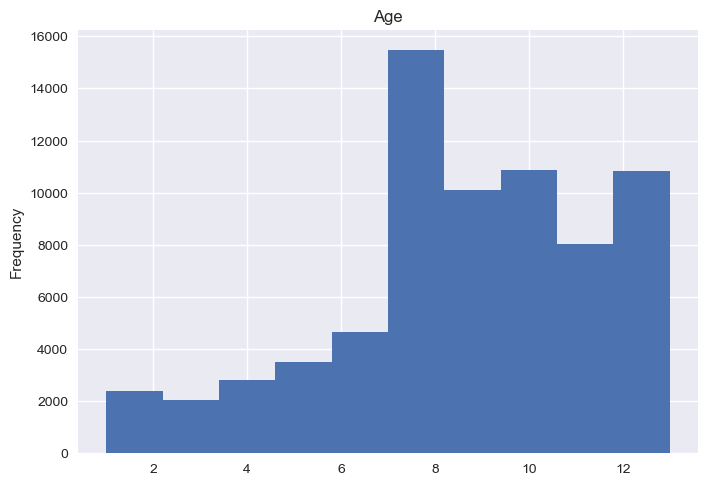

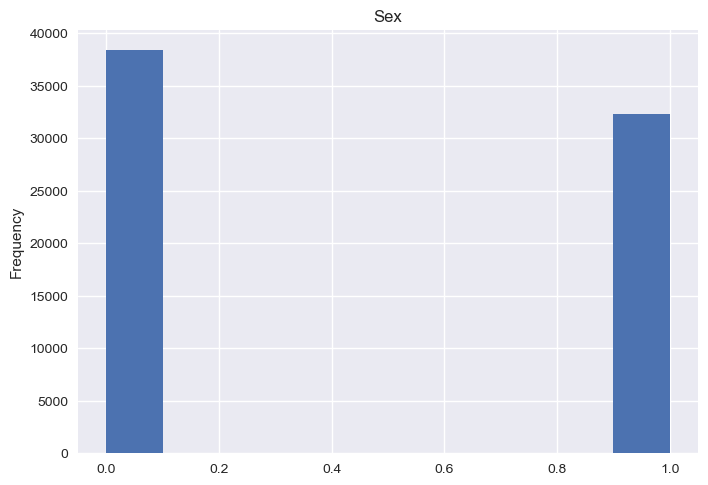

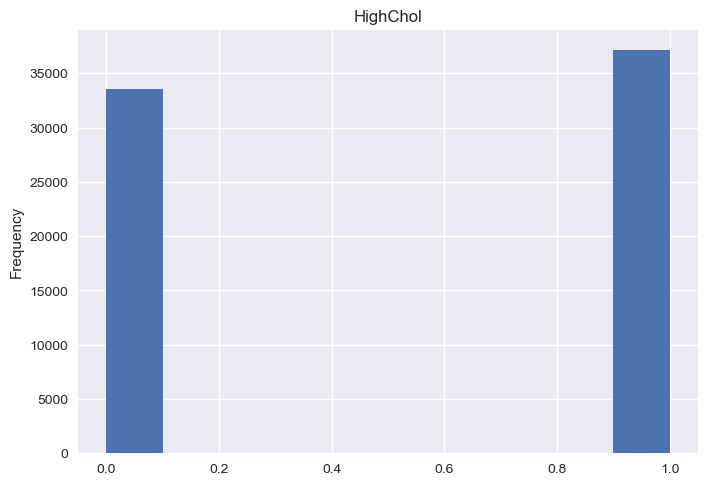

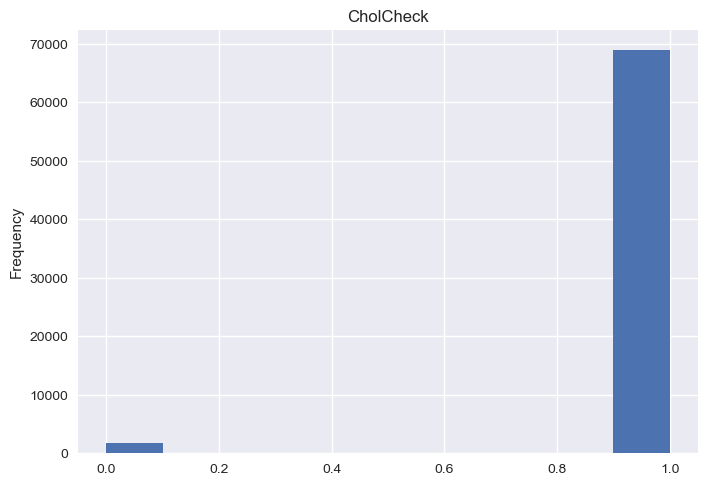

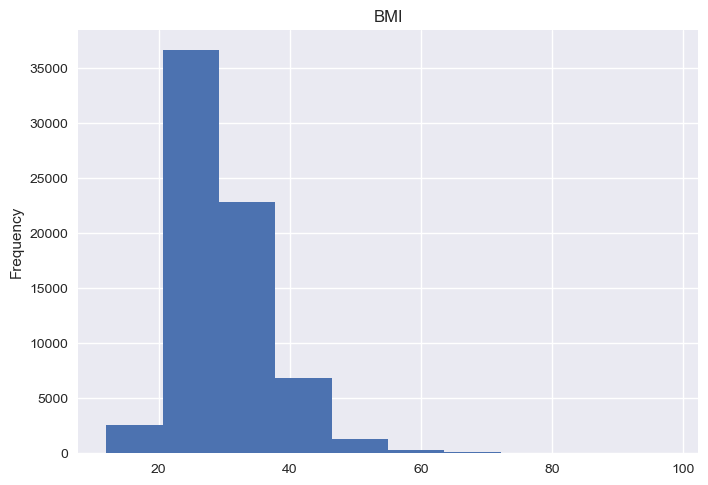

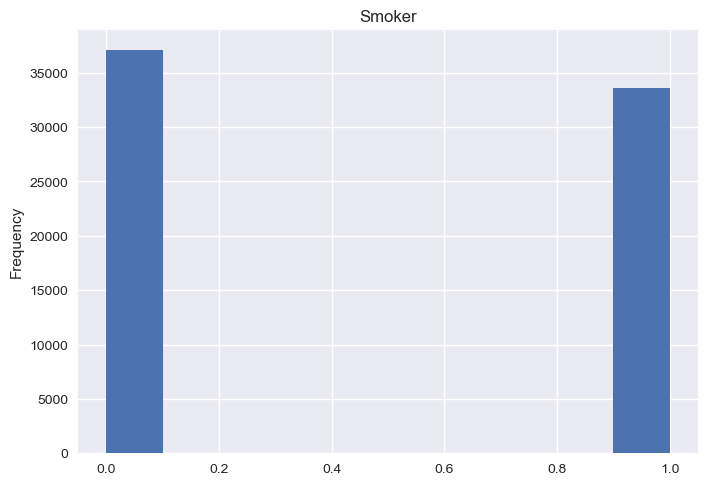

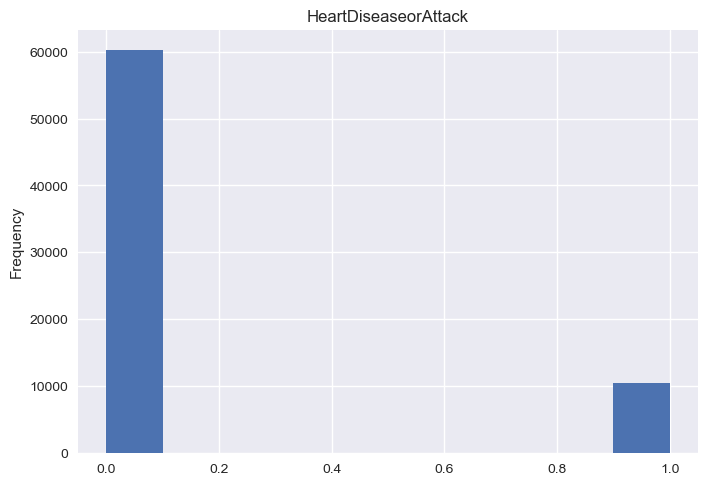

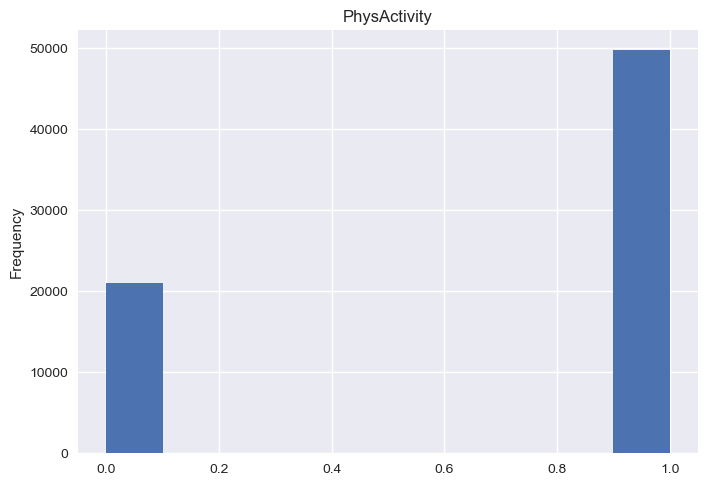

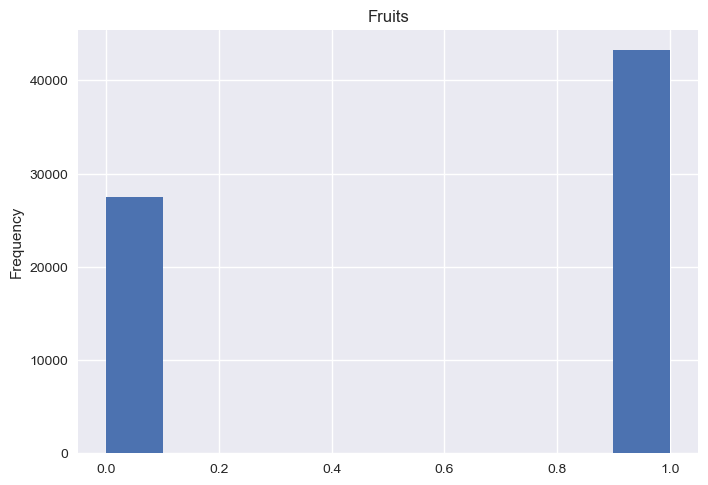

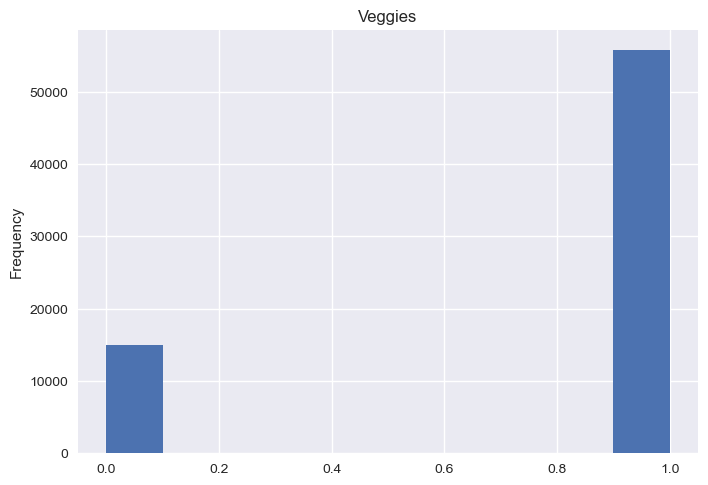

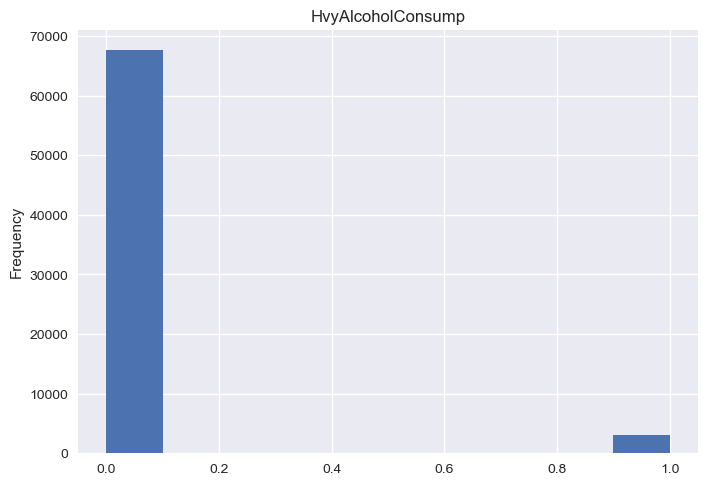

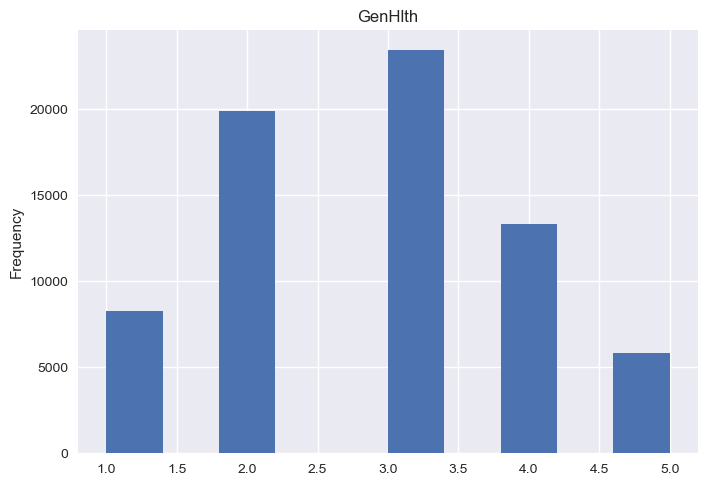

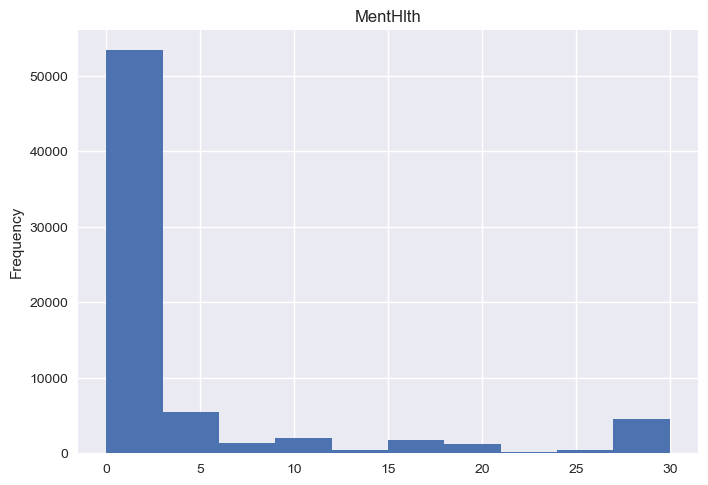

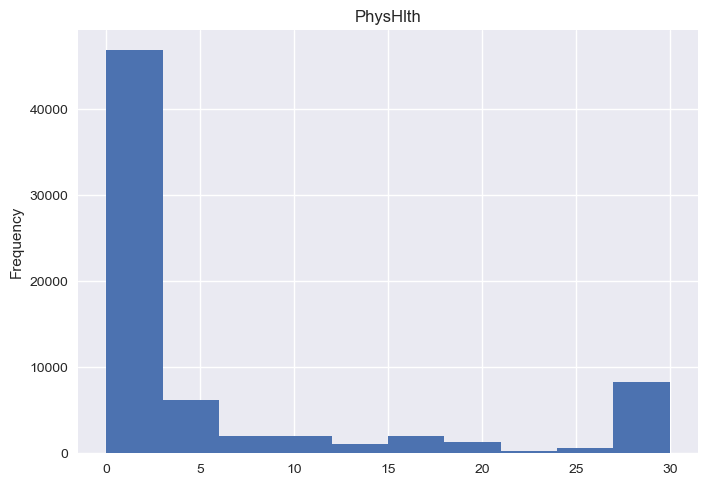

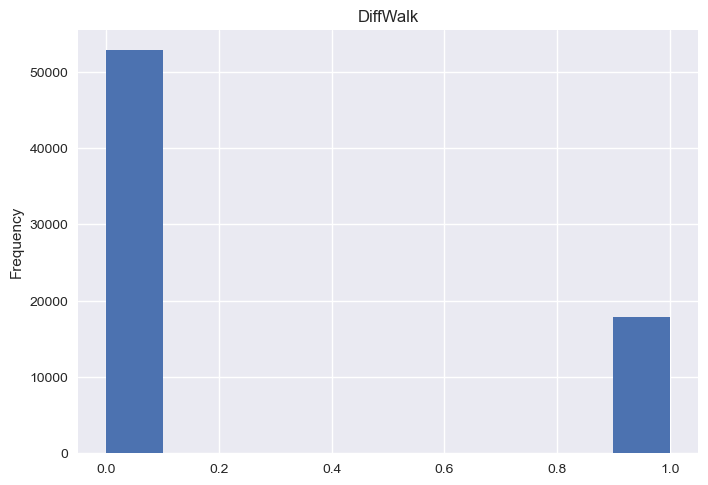

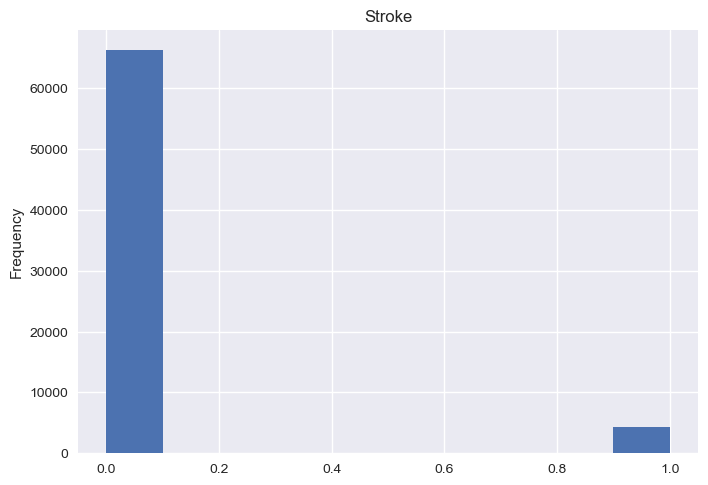

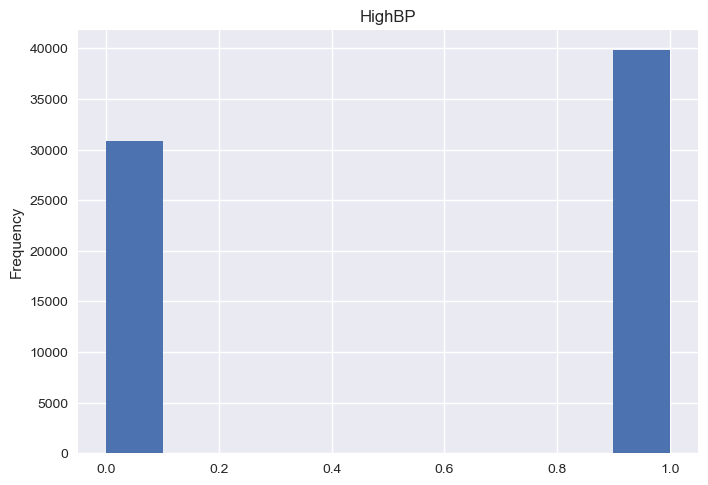

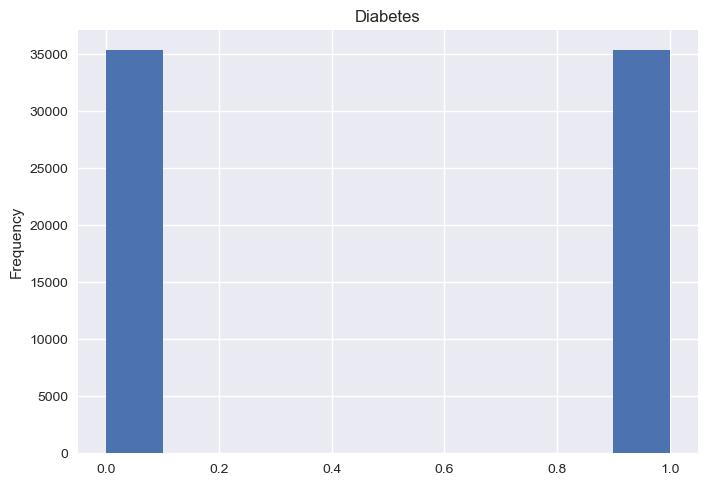

In [65]:
for i in diabetes.columns : 
    plt.figure()
    diabetes[i].plot.hist()
    plt.title(i)
    plt.show()

## Shape

In [26]:
diabetes.shape

(70692, 18)

In [30]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  float64
 15  Stroke             

In [36]:
import seaborn as sns 

Il semble que vous disposiez d'un ensemble de données contenant différentes variables numériques liées à la santé et aux habitudes de vie des individus. Pour déterminer les croisements (analyses bivariées) pertinents à effectuer entre ces variables, il est important de comprendre vos objectifs d'analyse et les relations que vous souhaitez explorer. Voici quelques suggestions de croisements possibles en fonction des thèmes que vous pourriez vouloir explorer :

**Analyse de risque cardiovasculaire :**

Croisez "Age" avec "HeartDiseaseorAttack", "HighChol", "CholCheck", "BMI", "Smoker", "HighBP", "Diabetes" pour examiner les facteurs de risque de maladies cardiaques.
Analysez la relation entre "HvyAlcoholConsump" et "HeartDiseaseorAttack".


**Influence de l'alimentation sur la santé :**

Croisez "Fruits" et "Veggies" avec "GenHlth", "MentHlth", "PhysHlth", "DiffWalk" pour évaluer l'impact de la consommation de fruits et légumes sur la santé physique et mentale.


**Effet du mode de vie sur la santé :**

Comparez "PhysActivity" avec les différentes variables de santé pour voir comment l'activité physique influence la santé globale.


**Associations générales :**

Explorez les liens entre "Age" et "BMI" pour étudier la distribution du poids à différents âges.
Comparez "Sex" avec d'autres variables pour identifier les différences entre les sexes en termes de santé et de comportements.
Risque de maladies spécifiques :

Analysez les croisements entre "Stroke" et "HighBP", "Diabetes" pour étudier les facteurs de risque liés aux accidents vasculaires cérébraux.
Impact de la santé mentale :

Croisez "MentHlth" avec d'autres variables pour évaluer son influence sur d'autres aspects de la santé.
Habitudes de vie et santé générale :

Analysez "Smoker" et "HvyAlcoholConsump" avec différentes variables de santé pour évaluer les effets de ces habitudes sur la santé générale.
N'oubliez pas de réaliser des analyses statistiques appropriées pour valider toute relation observée et interpréter les résultats de manière significative. Les croisements que vous choisissez dépendront de vos questions de recherche spécifiques et de vos hypothèses.

# 📍 Analyse de risque cardiovasculaire

 Croiser des variables de bien etre avec des variables de santé 

 La probabilité d'avoir une maladie cardiaque en fonction de l'age 
 
- Age 13-level age category (_AGEG5YR see codebook) 1 = 18-24 9 = 60-64 13 = 80 or older

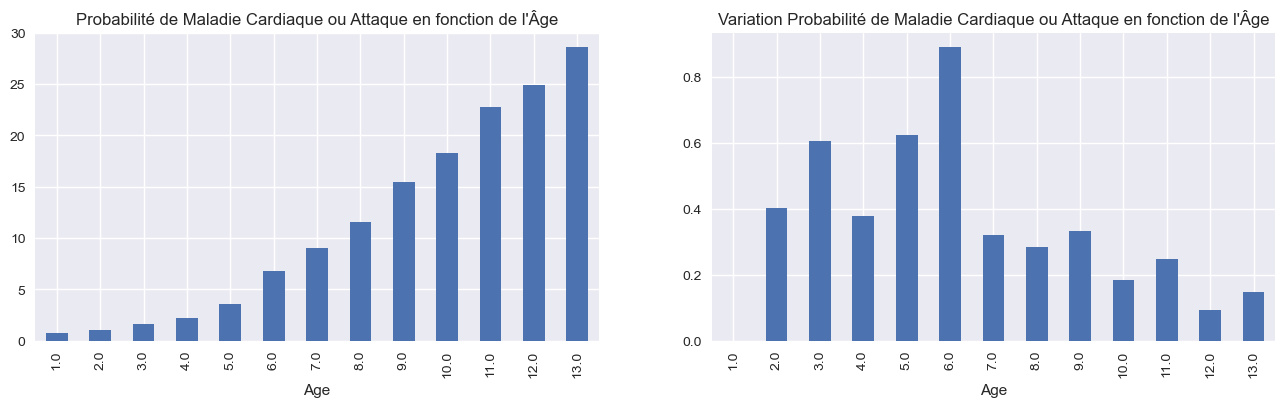

In [44]:
plt.figure(figsize=(16,4))

plt.subplot(1,2,1)
plt.title("Probabilité de Maladie Cardiaque ou Attaque en fonction de l'Âge")
(diabetes.groupby('Age')['HeartDiseaseorAttack'].apply(lambda x : x.sum()/len(x))*100).plot.bar()

plt.subplot(1,2,2)
plt.title("Variation Probabilité de Maladie Cardiaque ou Attaque en fonction de l'Âge")
(diabetes.groupby('Age')['HeartDiseaseorAttack'].apply(lambda x : x.sum()/len(x))*100).pct_change().plot.bar()


plt.show()

<Axes: title={'center': "Probabilité de Maladie Cardiaque ou Attaque en fonction de l'indice BMI biomass index"}, xlabel='BMI'>

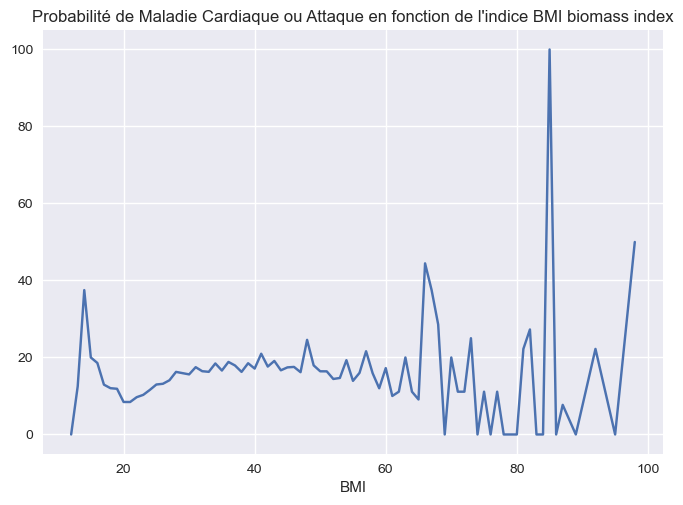

In [66]:
plt.title("Probabilité de Maladie Cardiaque ou Attaque en fonction de l'indice BMI biomass index")
(diabetes.groupby('BMI')['HeartDiseaseorAttack'].apply(lambda x : x.sum()/len(x))*100).plot()

In [43]:
diabetes.groupby('Smoker')['HeartDiseaseorAttack'].apply(lambda x : x.sum()/len(x))*100

Smoker
0.0    10.578530
1.0    19.420799
Name: HeartDiseaseorAttack, dtype: float64

<Axes: xlabel='Smoker'>

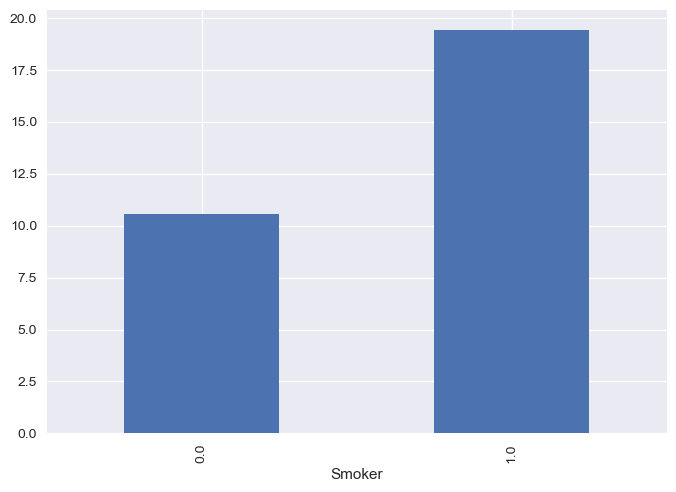

In [46]:
(diabetes.groupby('Smoker')['HeartDiseaseorAttack'].apply(lambda x : x.sum()/len(x))*100).plot.bar()

In [ ]:
diabetes.groupby('HighChol')['HeartDiseaseorAttack'].apply(lambda x : x.sum()/len(x))*100

HighChol
0.0     8.010976
1.0    20.889056
Name: HeartDiseaseorAttack, dtype: float64

<Axes: xlabel='HighChol'>

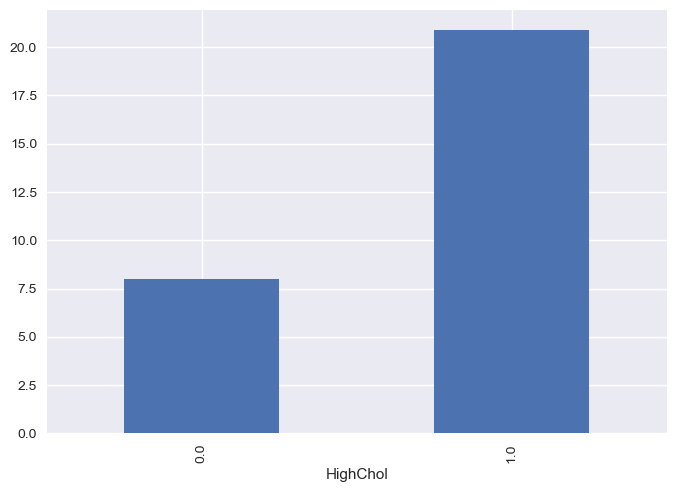

In [48]:
(diabetes.groupby('HighChol')['HeartDiseaseorAttack'].apply(lambda x : x.sum()/len(x))*100).plot.bar()

### 2 fois plus de chances d'avoir une maladie d'avoir une maladie cardiaque si on a un taux de cholestérol élevé

In [102]:
diabetes.groupby('CholCheck')['HeartDiseaseorAttack'].apply(lambda x : x.sum()/len(x))*100

CholCheck
0.0     5.088622
1.0    15.026906
Name: HeartDiseaseorAttack, dtype: float64

 BMI -- HeartDiseaseorAttack

In [50]:
BMI_ABV_MEAN = (diabetes['HeartDiseaseorAttack'].to_frame()).join(\
                                                (diabetes['BMI'] > diabetes['BMI'].mean()).to_frame(name='BMI_ABV_MEAN'))\
                                               .groupby('BMI_ABV_MEAN')['HeartDiseaseorAttack'].apply(lambda x : x.sum()/len(x))*100                                          

La probabilité d'avoir une maladie cardiaque en fonction de BMI au dessus de la moyenne 

en valeur absolue 5 point proba passe de 12% à 17%

mais en proportion (17/12)-1 =0.33 au augmentation de 33%


en gros si je dis elle augmente de 5% j'ai raison et si je dis elle augmente de 33% j'ai aussi raison conclusion la terre est plateBMI_ABV_MEAN.plot.pie()

In [52]:
BMI_ABV_MEAN

BMI_ABV_MEAN
False    12.871993
True     17.163847
Name: HeartDiseaseorAttack, dtype: float64

<Axes: xlabel='BMI_ABV_MEAN'>

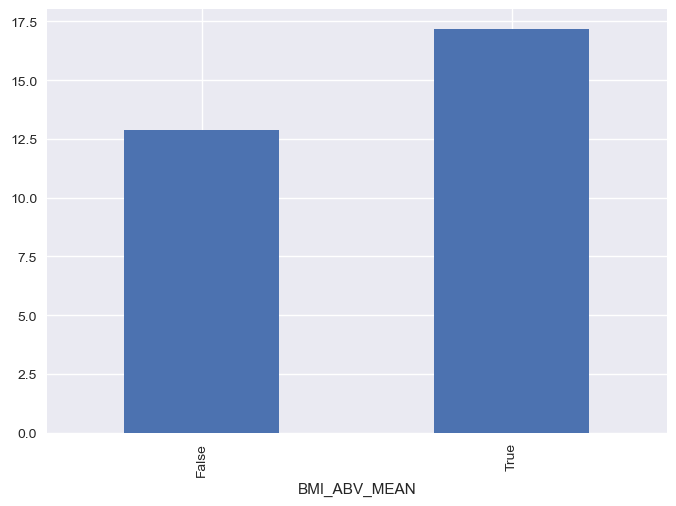

In [53]:
BMI_ABV_MEAN.plot.bar()

In [129]:
BMI_ABV_MEAN.pct_change()*100

BMI_ABV_MEAN
False          NaN
True     33.342569
Name: HeartDiseaseorAttack, dtype: float64

## Analyse itérative de corrélation

In [62]:
sns.heatmap(diabetes.corr()['HeartDiseaseorAttack'].sort_values(ascending=False)[1:].to_frame()

SyntaxError: incomplete input (359668336.py, line 1)

In [63]:
diabetes.corr()['HeartDiseaseorAttack'].sort_values(ascending=False)[1:]

GenHlth              0.275868
DiffWalk             0.232611
Stroke               0.223394
Age                  0.221878
Diabetes             0.211523
HighBP               0.210750
PhysHlth             0.198416
HighChol             0.181187
Smoker               0.124418
Sex                  0.098161
MentHlth             0.075057
BMI                  0.060355
CholCheck            0.043497
Fruits              -0.019436
Veggies             -0.036315
HvyAlcoholConsump   -0.037130
PhysActivity        -0.098223
Name: HeartDiseaseorAttack, dtype: float64

<Axes: title={'center': 'Corrélation inter-variable : maladie cardiaque'}>

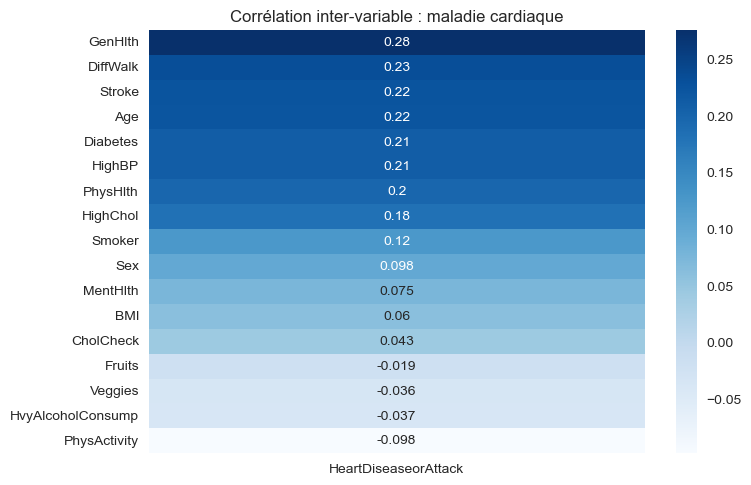

In [61]:
plt.title("Corrélation inter-variable : maladie cardiaque")
sns.heatmap(diabetes.corr()['HeartDiseaseorAttack'].sort_values(ascending=False)[1:].to_frame(),annot=True,cmap='Blues')

In [135]:
diabetes.columns

Index(['Age', 'Sex', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk',
       'Stroke', 'HighBP', 'Diabetes'],
      dtype='object')

In [137]:
import scipy

# 📍 Influence de l'alimentation sur la santé :
Croisez "Fruits" et "Veggies" avec "GenHlth", "MentHlth", "PhysHlth", "DiffWalk" pour évaluer l'impact de la consommation de fruits et légumes sur la santé physique et mentale.

- Veggies : Consume Vegetables 1 or more times per day 0 = no 1 = yes

- Fruits : Consume Fruit 1 or more times per day 0 = no 1 = yes

- PhysActivity physical activity in past 30 days - not including job 0 = no 1 = yes 

- GenHlth :  Would you say that in general your health is: scale 1-5 1 = excellent 2 = very good 3 = good 4 = fair 5 = poor

- MentHlth :  days of poor mental health scale 1-30 days

- PhysHlth : physical illness or injury days in past 30 days scale 1-30

- DiffWalk :Do you have serious difficulty walking or climbing stairs? 0 = no 1 = yes

In [41]:
plt.style.use("seaborn")

/var/folders/5d/6z528s_s09ggzk7142dgylvc0000gn/T/ipykernel_62273/940468031.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


         PhysHlth
mean     5.810417
std     10.062261
median   0.000000
min      0.000000
max     30.000000


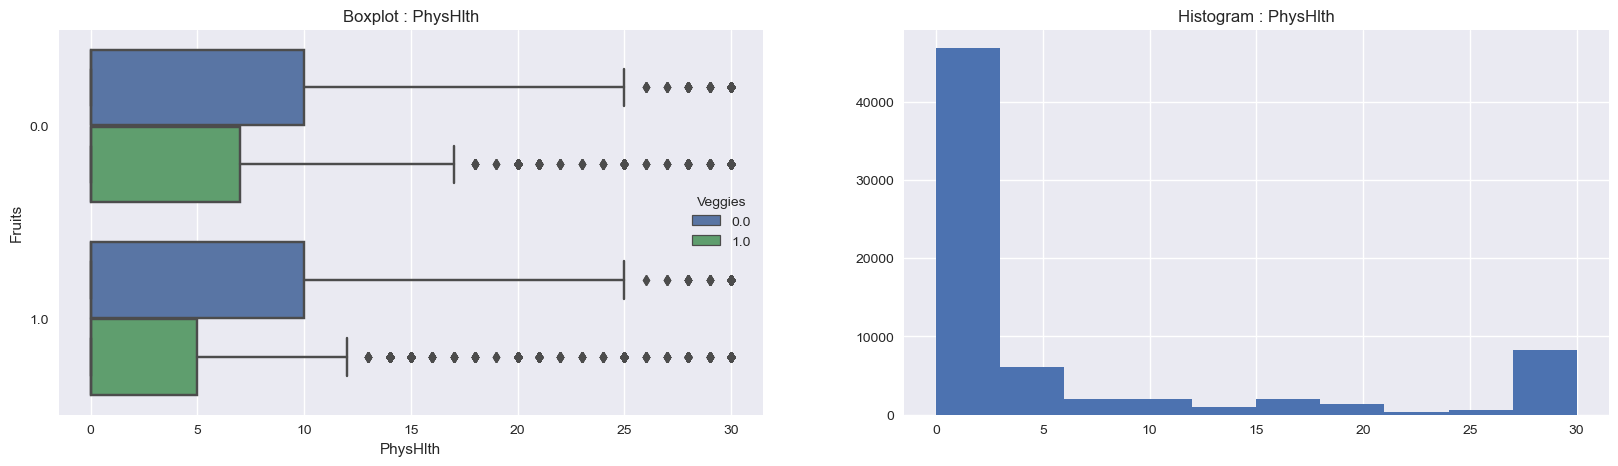

         MentHlth
mean     3.752037
std      8.155627
median   0.000000
min      0.000000
max     30.000000


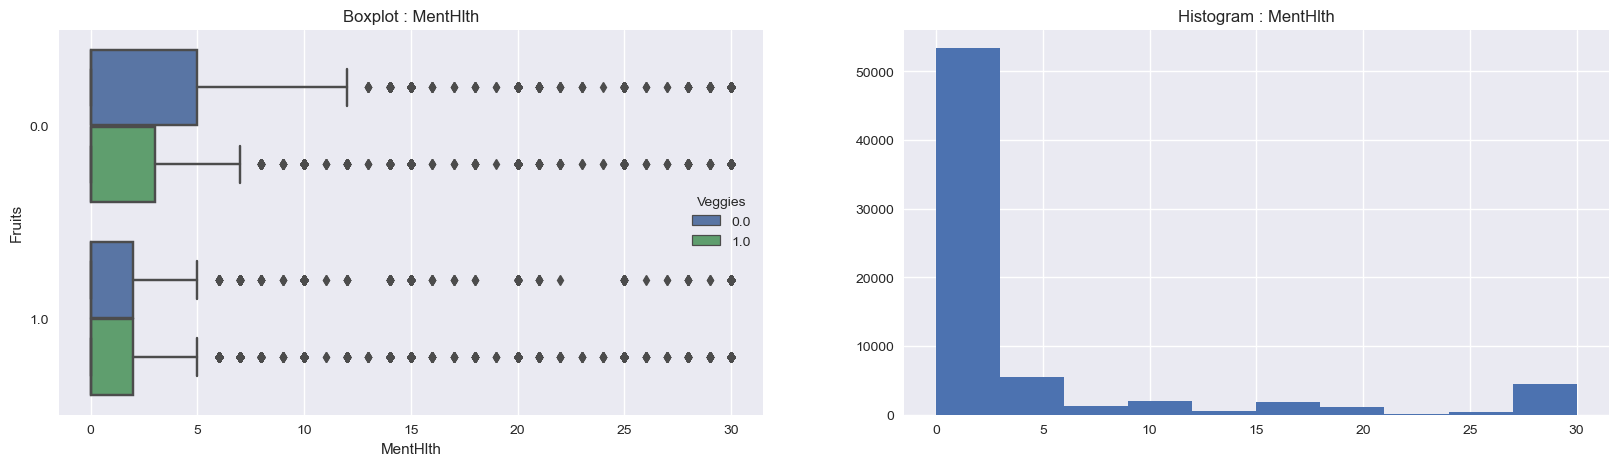

         GenHlth
mean    2.837082
std     1.113565
median  3.000000
min     1.000000
max     5.000000


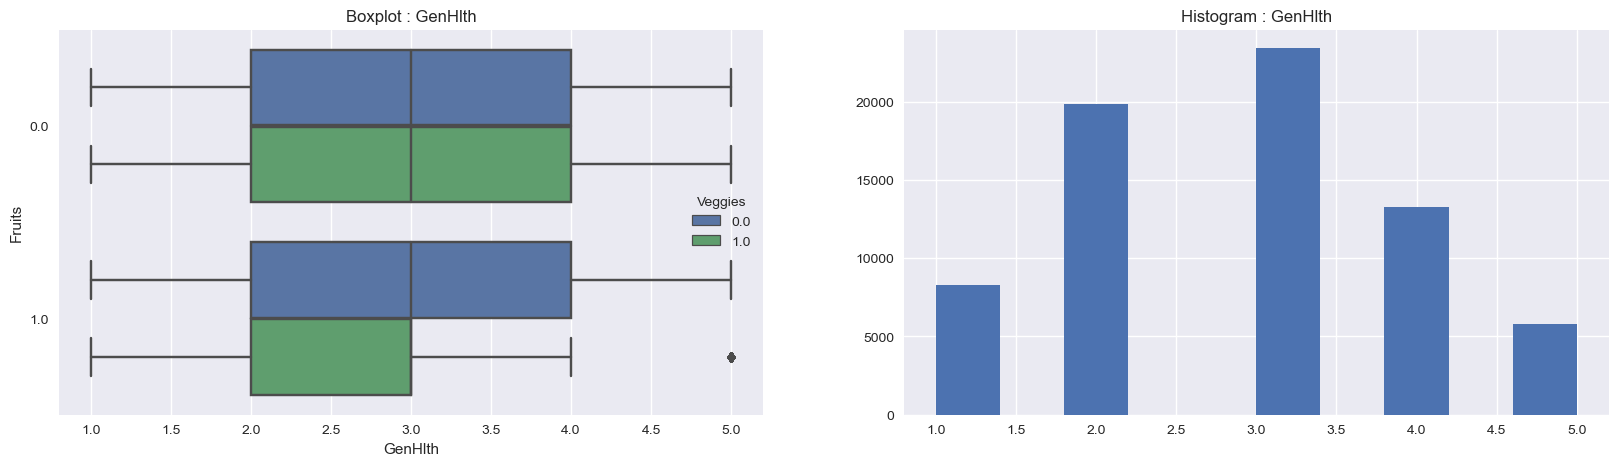

In [112]:
for i in ['PhysHlth','MentHlth',"GenHlth"]:
    print("="*50)
    print(diabetes[i].agg(['mean',"std",'median','min','max']).to_frame())
    plt.figure(figsize=(20,5))
    plt.subplot(1,2,1)
    plt.title(f'Boxplot : {i}')
    sns.boxplot(x=diabetes[i], y=diabetes['Fruits'].astype('category'), hue = diabetes['Veggies'].astype('category') )
    plt.subplot(1,2,2)
    plt.title(f'Histogram : {i}')
    plt.hist(diabetes[i])
    
    plt.show()
    print("="*50)

In [91]:
diabetes['DiffWalk'] = diabetes['DiffWalk'].astype("category")

In [92]:
diabetes.dtypes

Age                      float64
Sex                      float64
HighChol                 float64
CholCheck                float64
BMI                      float64
Smoker                   float64
HeartDiseaseorAttack     float64
PhysActivity             float64
Fruits                   float64
Veggies                  float64
HvyAlcoholConsump        float64
GenHlth                  float64
MentHlth                 float64
PhysHlth                 float64
DiffWalk                category
Stroke                   float64
HighBP                   float64
Diabetes                 float64
dtype: object

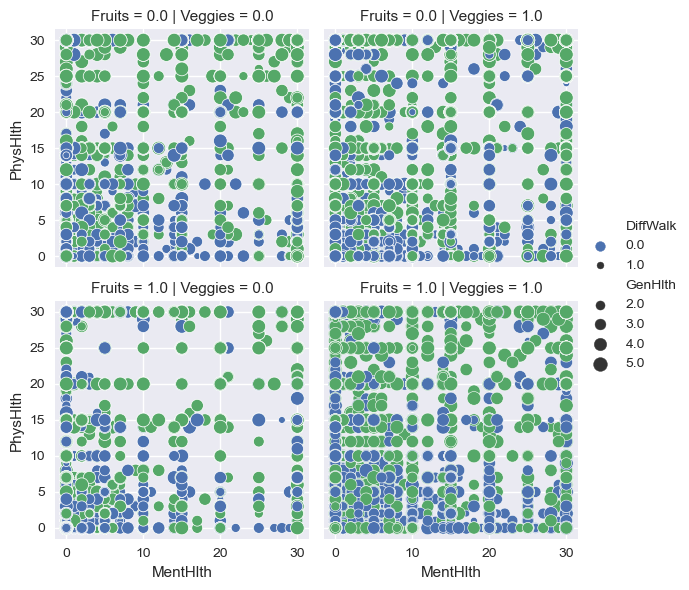

In [107]:
g = sns.FacetGrid(diabetes, col="Veggies", row='Fruits')
g.map(sns.scatterplot,"MentHlth","PhysHlth","DiffWalk","GenHlth")
g.add_legend()

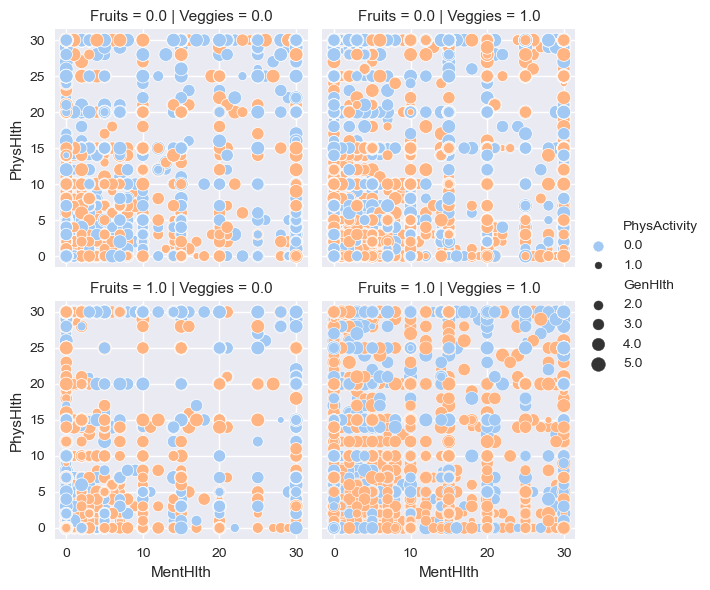

In [116]:
sns.set_palette("pastel")

g = sns.FacetGrid(diabetes, col="Veggies", row='Fruits')
g.map(sns.scatterplot,"MentHlth","PhysHlth","PhysActivity","GenHlth")
g.add_legend()

Cela peut etre liés à un biais dans les données qui est que un individu qui est malade ou en mauvaise santé va obligatoirement faire plus attention à sa nutrition qu'un individu sain en pleine forme 

## Matrice de corrélation

In [125]:
diabetes.groupby(['Veggies','Fruits'])[['GenHlth','MentHlth',"PhysHlth","PhysActivity"]].describe().T

Veggies                     0.0                        1.0              
Fruits                      0.0          1.0           0.0           1.0
GenHlth      count  9152.000000  5780.000000  18291.000000  37469.000000
             mean      3.126748     3.022145      2.899131      2.707492
             std       1.104870     1.098944      1.095867      1.106554
             min       1.000000     1.000000      1.000000      1.000000
             25%       2.000000     2.000000      2.000000      2.000000
             50%       3.000000     3.000000      3.000000      3.000000
             75%       4.000000     4.000000      4.000000      3.000000
             max       5.000000     5.000000      5.000000      5.000000
MentHlth     count  9152.000000  5780.000000  18291.000000  37469.000000
             mean      4.971372     3.953114      4.095894      3.255331
             std       9.356433     8.444748      8.440030      7.593783
             min       0.000000     0.000000      0.000000      0.000000
             25%       0.000000     0.000000      0.000000      0.000000
             50%       0.000000     0.000000      0.000000      0.000000
             75%       5.000000     2.000000      3.000000      2.000000
             max      30.000000    30.000000     30.000000     30.000000
PhysHlth     count  9152.000000  5780.000000  18291.000000  37469.000000
             mean      7.336101     6.755017      5.967580      5.215325
             std      11.097043    10.743684     10.127011      9.592304
             min       0.000000     0.000000      0.000000      0.000000
             25%       0.000000     0.000000      0.000000      0.000000
             50%       0.000000     0.000000      0.000000      0.000000
             75%      10.000000    10.000000      7.000000      5.000000
             max      30.000000    30.000000     30.000000     30.000000
PhysActivity count  9152.000000  5780.000000  18291.000000  37469.000000
             mean      0.537150     0.625087      0.670876      0.771278
             std       0.498645     0.484142      0.469908      0.420016
             min       0.000000     0.000000      0.000000      0.000000
             25%       0.000000     0.000000      0.000000      1.000000
             50%       1.000000     1.000000      1.000000      1.000000
             75%       1.000000     1.000000      1.000000      1.000000
             max       1.000000     1.000000      1.000000      1.000000

In [129]:
diabetes[['Veggies','Fruits','GenHlth','MentHlth',"PhysHlth","PhysActivity"]].corr()['Veggies']*100

Veggies         100.000000
Fruits           23.860529
GenHlth         -11.579532
MentHlth         -5.235907
PhysHlth         -6.689600
PhysActivity     14.932234
Name: Veggies, dtype: float64

In [130]:
diabetes[['Veggies','Fruits','GenHlth','MentHlth',"PhysHlth","PhysActivity"]].corr()['Fruits']*100

Veggies          23.860529
Fruits          100.000000
GenHlth          -9.868696
MentHlth         -6.210244
PhysHlth         -4.857213
PhysActivity     13.381291
Name: Fruits, dtype: float64

In [131]:
diabetes.groupby('Veggies')['Fruits'].apply(lambda x : x.sum()/len(x))*100

Veggies
0.0    38.708813
1.0    67.196915
Name: Fruits, dtype: float64

In [135]:
diabetes['Fruits'].sum()/len(diabetes['Veggies'])

0.611794828269111

In [132]:
diabetes.groupby('Fruits')['Veggies'].apply(lambda x : x.sum()/len(x))*100

Fruits
0.0    66.650876
1.0    86.635529
Name: Veggies, dtype: float64

In [134]:
diabetes['Veggies'].sum()/len(diabetes['Veggies'])

0.788773835794715

In [183]:
import scipy


for i in diabetes.columns:
    pearson_corr, p_value = scipy.stats.pearsonr(diabetes[i], diabetes['HeartDiseaseorAttack'])
    
    if p_value > 0.05 : 
        print("="*50)
        print(i)
        print("Pearson correlation coefficient:", pearson_corr)
        print("p-value:", p_value)
        print("="*50)

In [186]:
diabetes.head(2)

Age  Sex  HighChol  CholCheck   BMI  Smoker  HeartDiseaseorAttack  \
0   4.0  1.0       0.0        1.0  26.0     0.0                   0.0   
1  12.0  1.0       1.0        1.0  26.0     1.0                   0.0   

   PhysActivity  Fruits  Veggies  HvyAlcoholConsump  GenHlth  MentHlth  \
0           1.0     0.0      1.0                0.0      3.0       5.0   
1           0.0     1.0      0.0                0.0      3.0       0.0   

   PhysHlth  DiffWalk  Stroke  HighBP  Diabetes  
0      30.0       0.0     0.0     1.0       0.0  
1       0.0       0.0     1.0     1.0       0.0

In [185]:
import itertools
from scipy.stats import chi2_contingency

col = ['Veggies','Fruits','GenHlth','MentHlth',"PhysHlth","PhysActivity"]
items = list(itertools.combinations(col, 2))

for item in items: 
    contingency_table = pd.crosstab(diabetes[item[0]], diabetes[item[1]])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print("="*50)
    if p<0.05: 
        print(f"Rejet de l'independance for {item}")
        print(f"La p-value est : {p}")
    print("="*50)

Rejet de l'independance for ('Veggies', 'Fruits')
La p-value est : 0.0
Rejet de l'independance for ('Veggies', 'GenHlth')
La p-value est : 4.318776052073529e-210
Rejet de l'independance for ('Veggies', 'MentHlth')
La p-value est : 5.309952355534417e-34
Rejet de l'independance for ('Veggies', 'PhysHlth')
La p-value est : 1.9988714644227698e-57
Rejet de l'independance for ('Veggies', 'PhysActivity')
La p-value est : 0.0
Rejet de l'independance for ('Fruits', 'GenHlth')
La p-value est : 2.3525684772895332e-152
Rejet de l'independance for ('Fruits', 'MentHlth')
La p-value est : 2.267190252779708e-52
Rejet de l'independance for ('Fruits', 'PhysHlth')
La p-value est : 9.491131837710893e-32
Rejet de l'independance for ('Fruits', 'PhysActivity')
La p-value est : 4.1231778641677254e-277
Rejet de l'independance for ('GenHlth', 'MentHlth')
La p-value est : 0.0
Rejet de l'independance for ('GenHlth', 'PhysHlth')
La p-value est : 0.0
Rejet de l'independance for ('GenHlth', 'PhysActivity')
La p-valu

# 📍 Effet du mode de vie sur la santé :

Comparez "PhysActivity" avec les différentes variables de santé pour voir comment l'activité physique influence la santé globale.


- PhysActivity physical activity in past 30 days - not including job 0 = no 1 = yes

In [189]:
diabetes['PhysActivity'].value_counts()

1.0    49699
0.0    20993
Name: PhysActivity, dtype: int64

In [195]:
diabetes.columns

Index(['Age', 'Sex', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk',
       'Stroke', 'HighBP', 'Diabetes'],
      dtype='object')

In [215]:
sns.set_theme(style="darkgrid") 

<Axes: xlabel='PhysActivity', ylabel='GenHlth'>

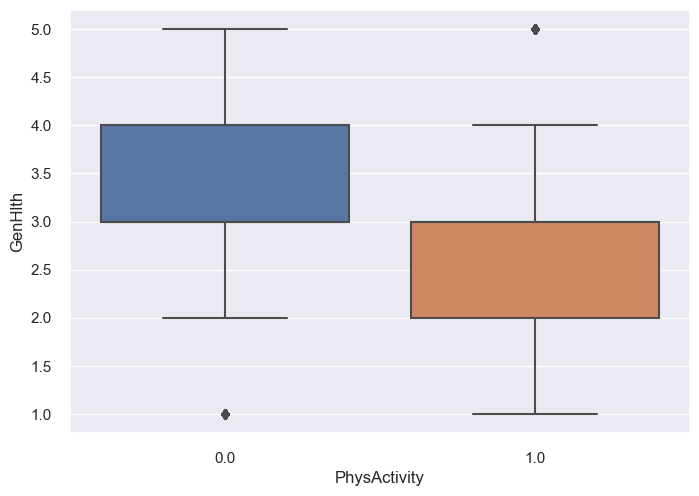

In [216]:
sns.boxplot(data = diabetes, x="PhysActivity", y="GenHlth")

<Axes: xlabel='PhysActivity', ylabel='BMI'>

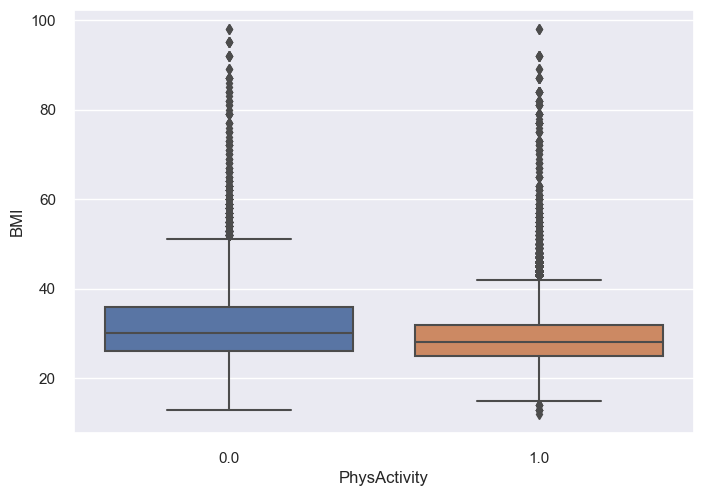

In [238]:
sns.boxplot(data = diabetes, x="PhysActivity", y="BMI")

In [222]:
diabetes.groupby('PhysActivity')['Diabetes'].apply(lambda x : x.sum()/len(x))*100

PhysActivity
0.0    62.206450
1.0    44.843961
Name: Diabetes, dtype: float64

In [223]:
diabetes.groupby('PhysActivity')['Stroke'].apply(lambda x : x.sum()/len(x))*100

PhysActivity
0.0    9.188777
1.0    4.961870
Name: Stroke, dtype: float64

In [224]:
diabetes.groupby('PhysActivity')['HighBP'].apply(lambda x : x.sum()/len(x))*100

PhysActivity
0.0    66.731768
1.0    51.958792
Name: HighBP, dtype: float64

# 📍 Associations générales : 

Explorez les liens entre "Age" et "BMI" pour étudier la distribution du poids à différents âges. 

Comparez "Sex" avec d'autres variables pour identifier les différences entre les sexes en termes de santé et de comportements. 

- Classification	BMI range - kg/m2
- Severe Thinness	< 16
- Moderate Thinness	16 - 17
- Mild Thinness	17 - 18.5
- Normal	18.5 - 25
- Overweight	25 - 30
- Obese Class I	30 - 35
- Obese Class II	35 - 40
- Obese Class III	> 40

In [237]:
diabetes.groupby('Sex')[["Age","BMI"]].agg(['mean','std','median','min','max','count']).T

Sex                  0.0           1.0
Age mean        8.590111      8.576859
    std         2.858883      2.844163
    median      9.000000      9.000000
    min         1.000000      1.000000
    max        13.000000     13.000000
    count   38386.000000  32306.000000
BMI mean       29.851587     29.863400
    std         7.693875      6.356592
    median     28.000000     29.000000
    min        13.000000     12.000000
    max        98.000000     92.000000
    count   38386.000000  32306.000000

 Quelle est la combinaison de variable qui explique au mieux le GenHlth

#  📍 Risque de maladies spécifiques : 

Analysez les croisements entre "Stroke" et "HighBP", "Diabetes" pour étudier les facteurs de risque liés aux accidents vasculaires cérébraux. 



In [13]:
deases_col = ["Stroke","HighBP","Diabetes"]

other_col  = [col for col in diabetes.columns if col not in deases_col]

In [14]:
diabetes.columns

Index(['Age', 'Sex', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk',
       'Stroke', 'HighBP', 'Diabetes'],
      dtype='object')

In [87]:
(diabetes.query('Age >= 2 & Age <=4').groupby(['Veggies'])["Diabetes"].apply(lambda x : x.sum()/len(x))*100).pct_change()

Veggies
0.0         NaN
1.0   -0.316173
Name: Diabetes, dtype: float64

In [92]:
(diabetes.groupby(['Veggies','Fruits'])["Diabetes"].apply(lambda x : x.sum()/len(x))*100)

Veggies  Fruits
0.0      0.0       57.626748
         1.0       57.716263
1.0      0.0       51.276584
         1.0       46.323628
Name: Diabetes, dtype: float64

0.1958333333333333

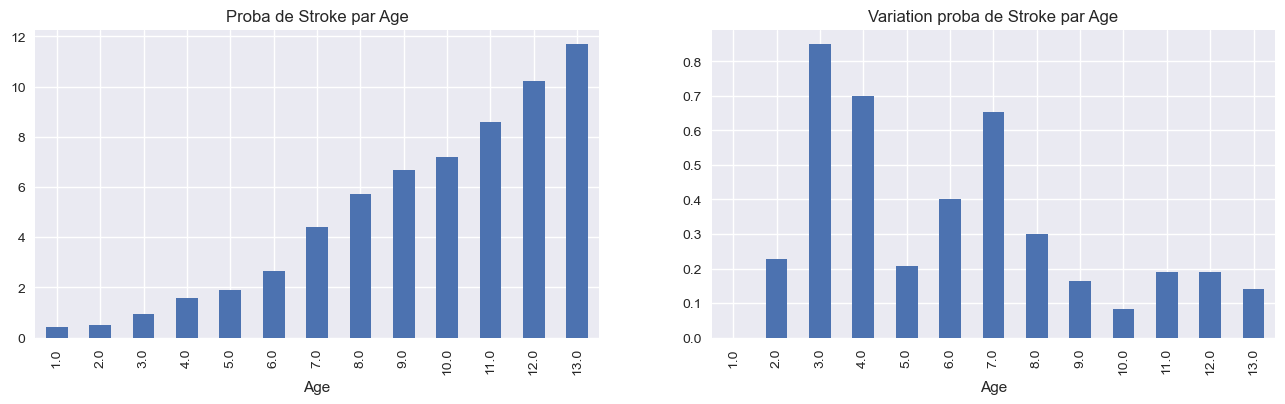

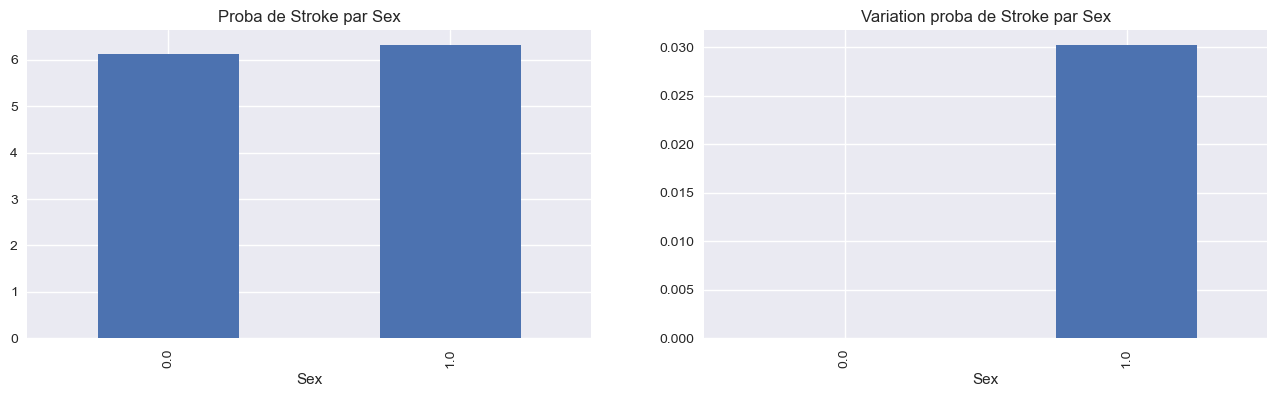

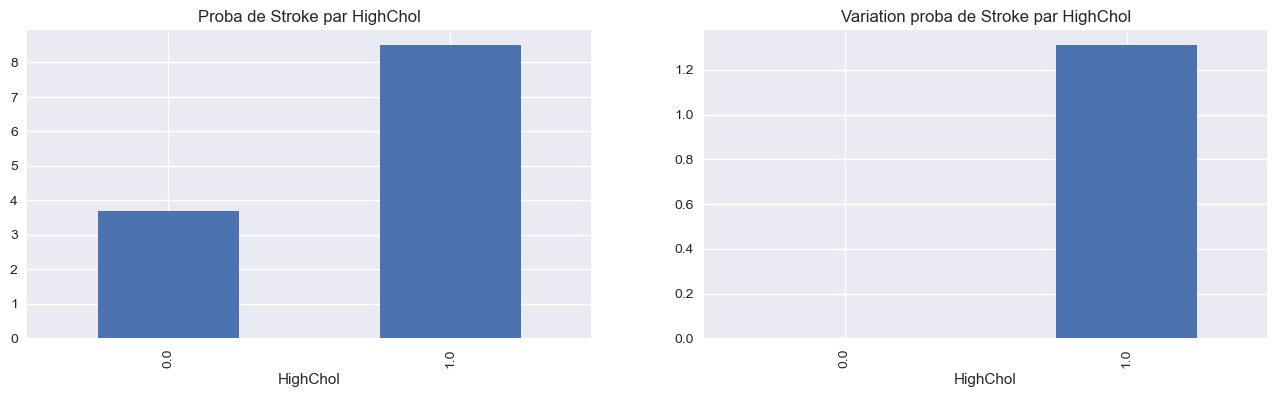

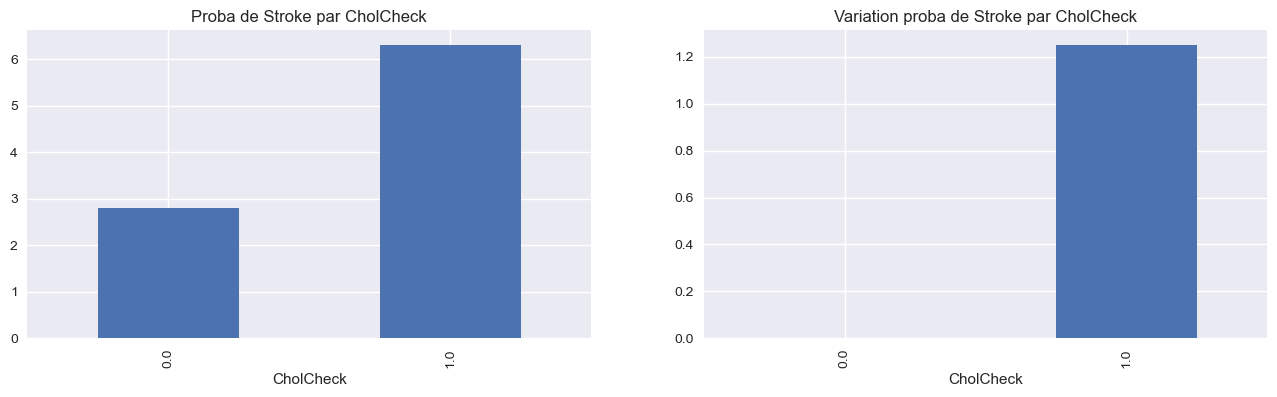

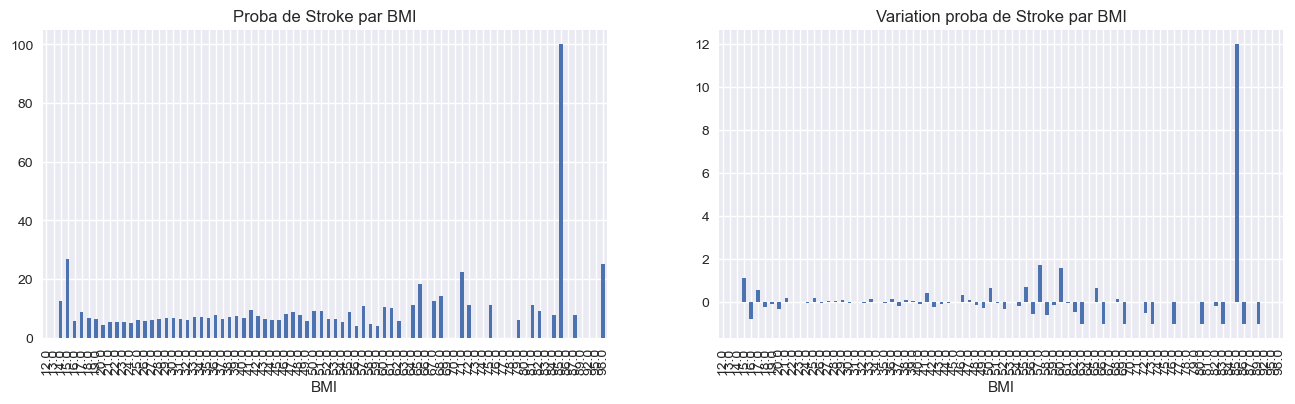

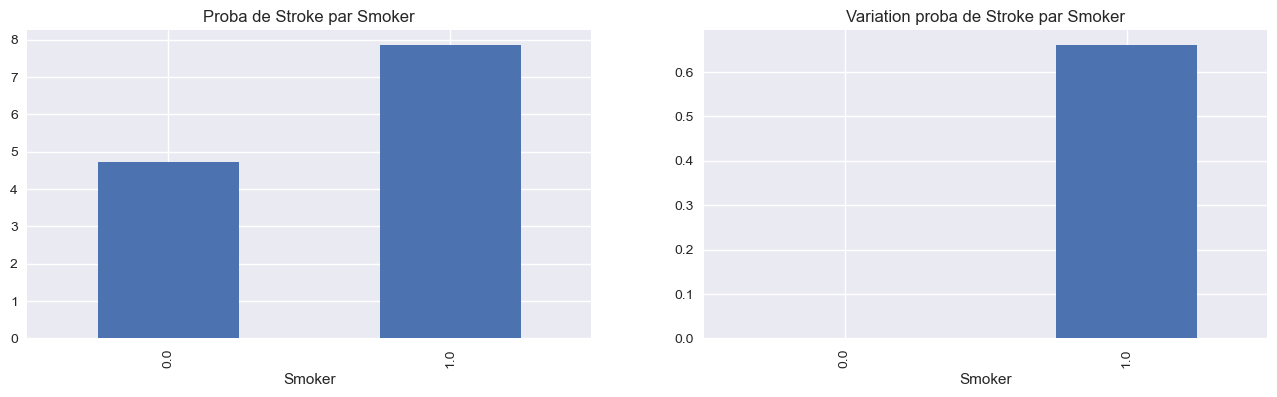

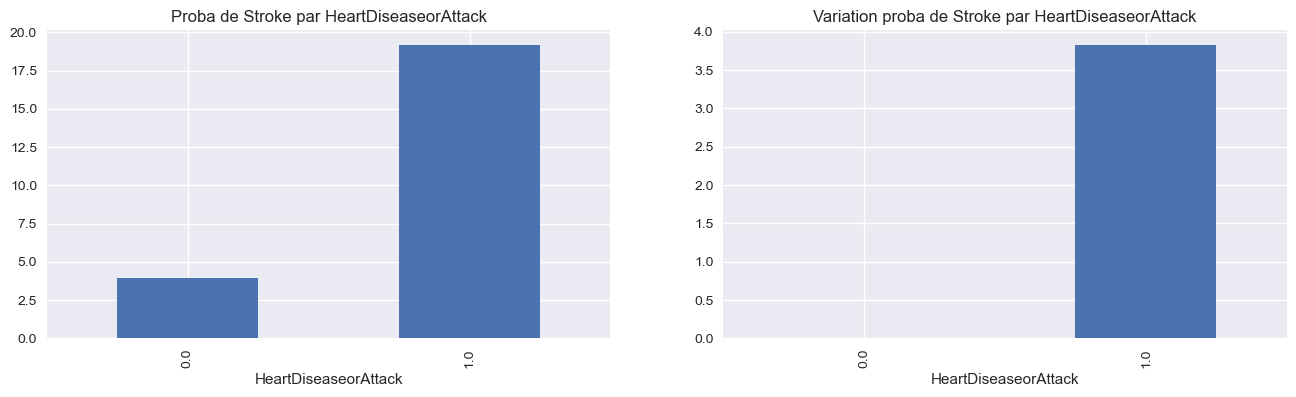

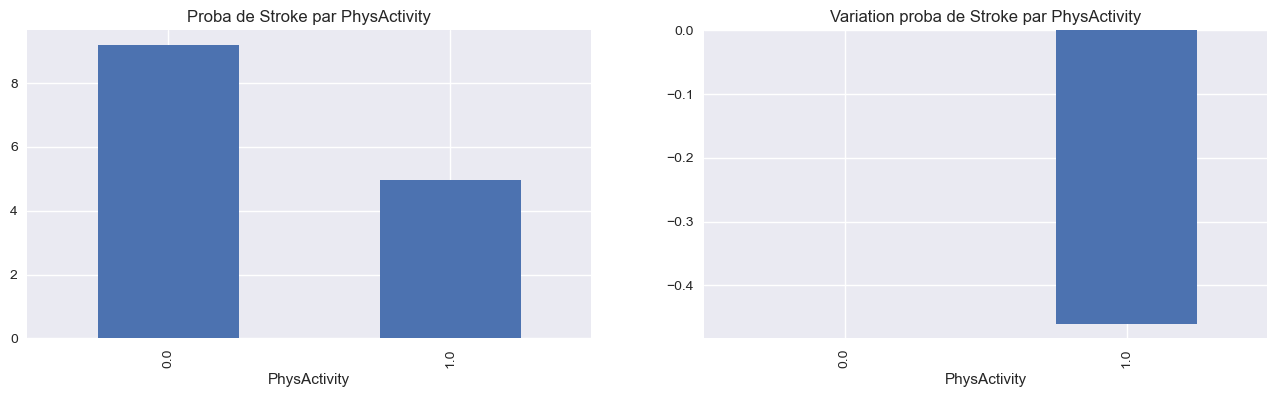

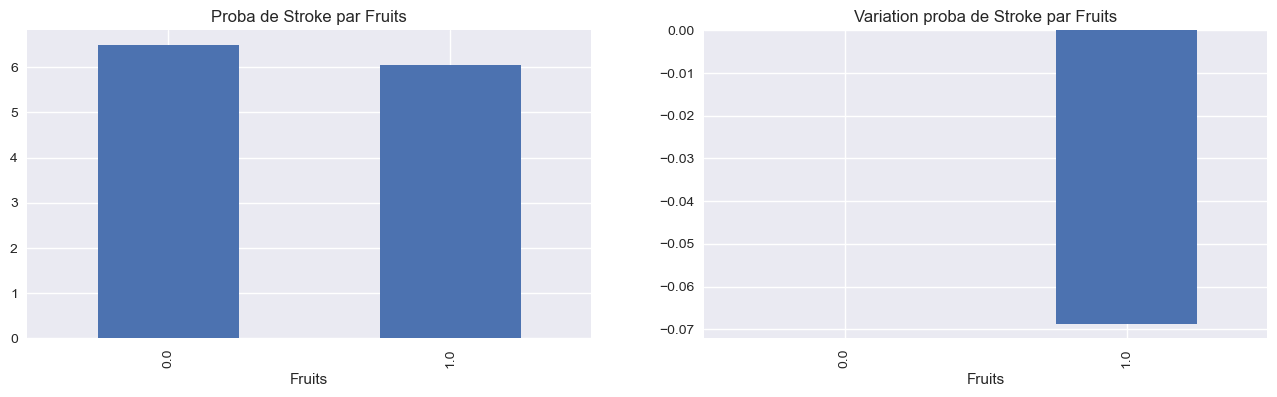

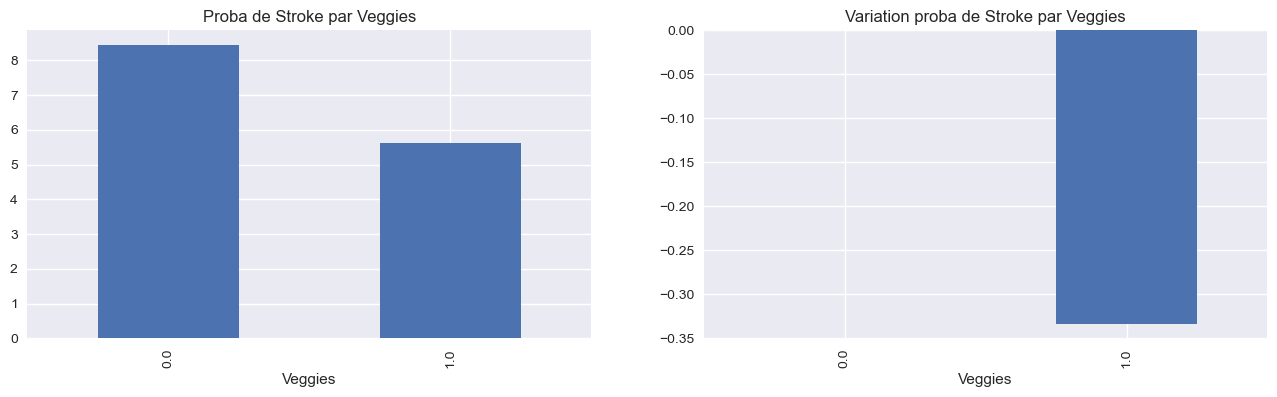

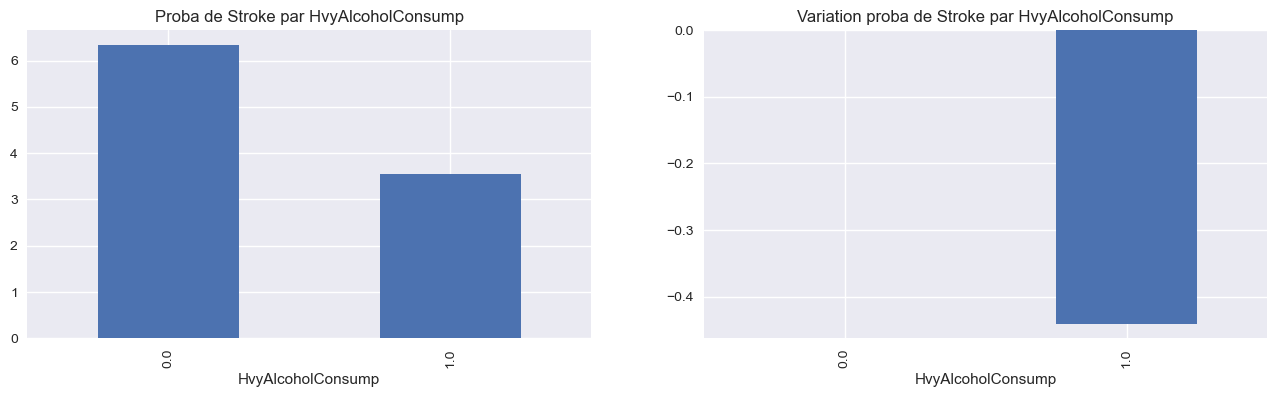

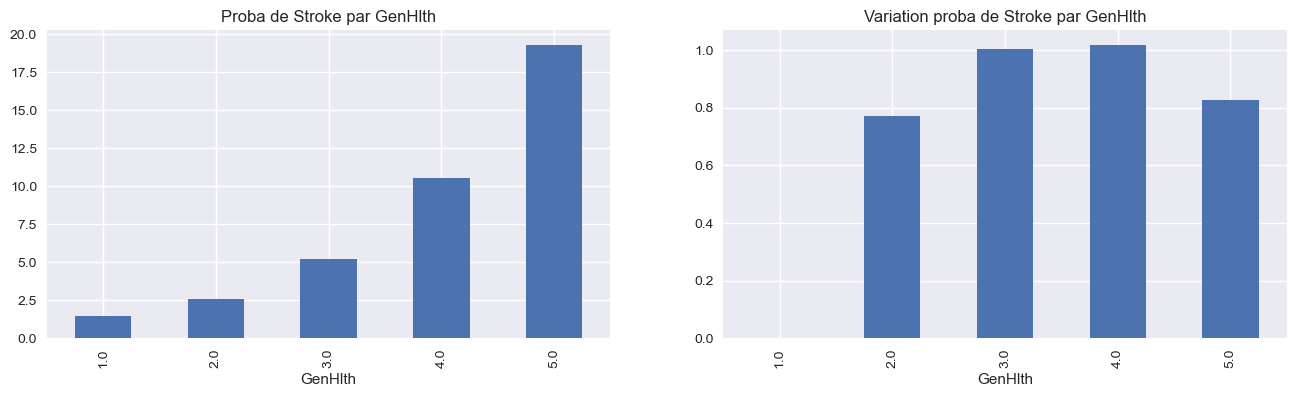

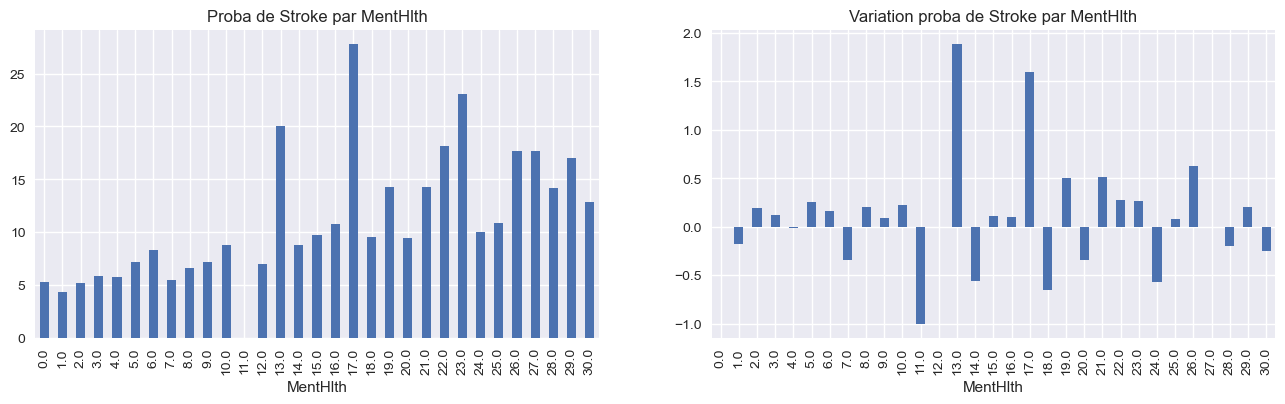

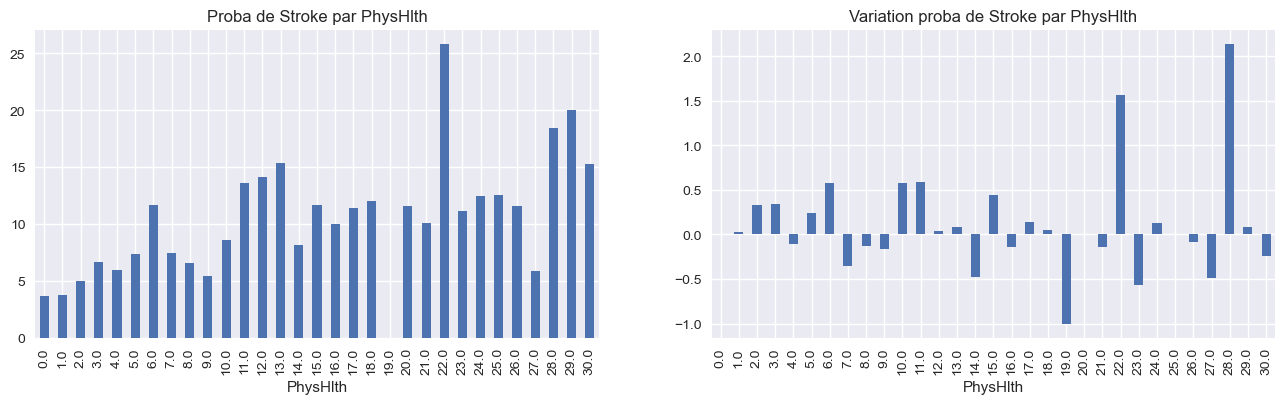

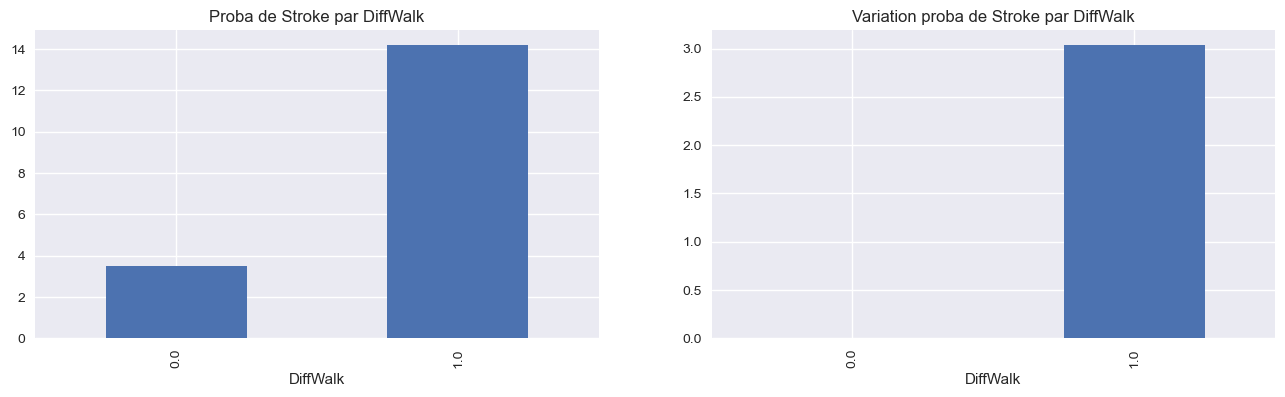

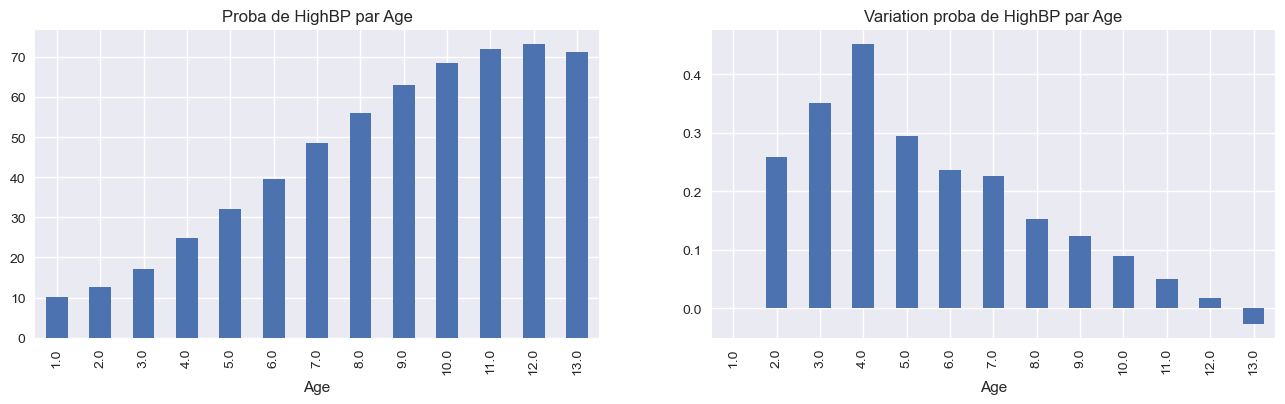

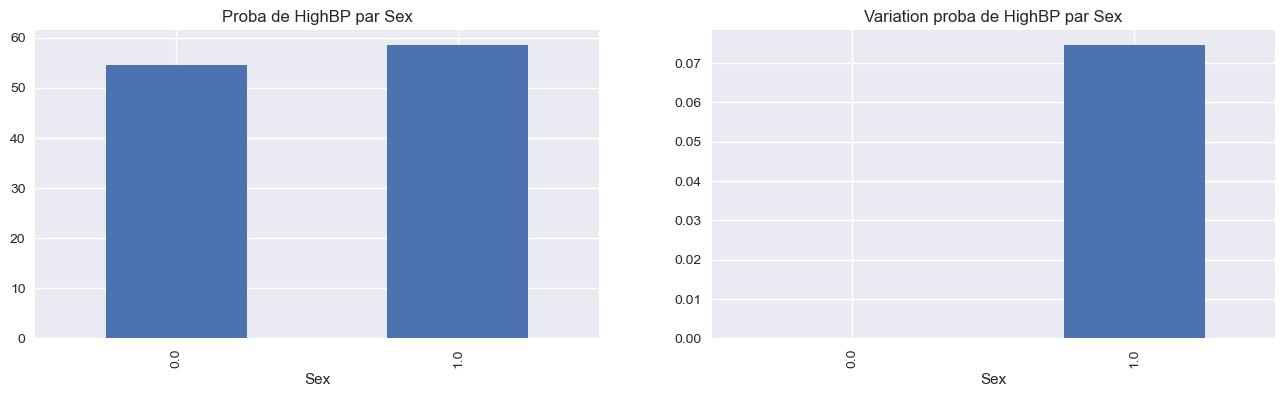

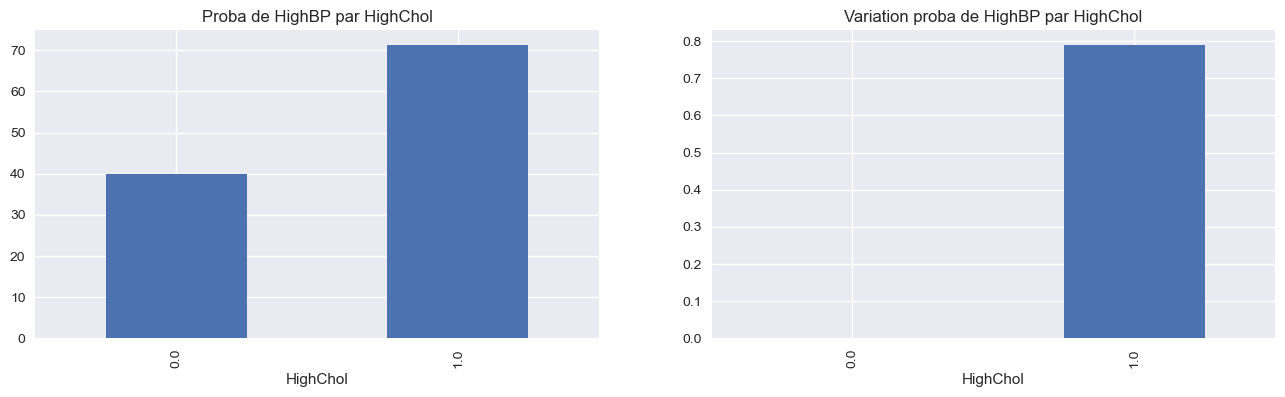

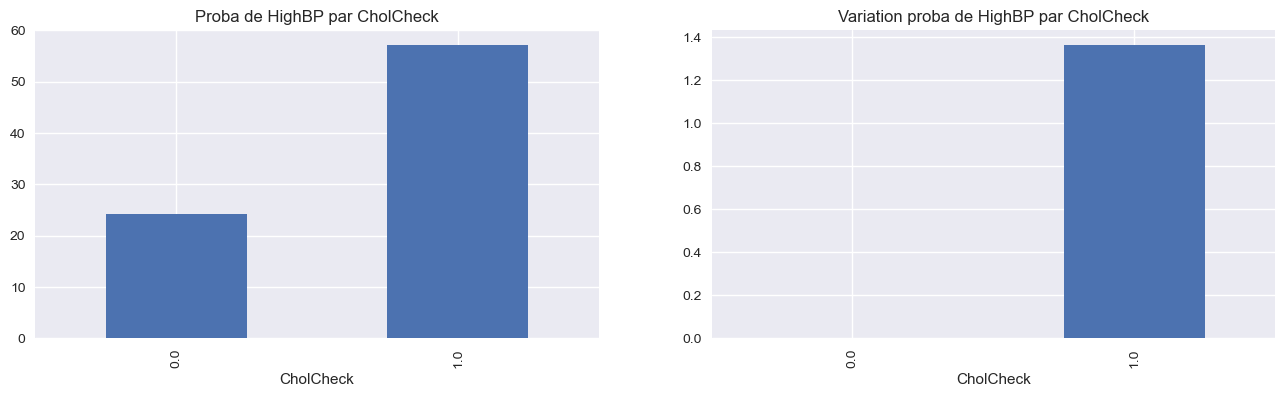

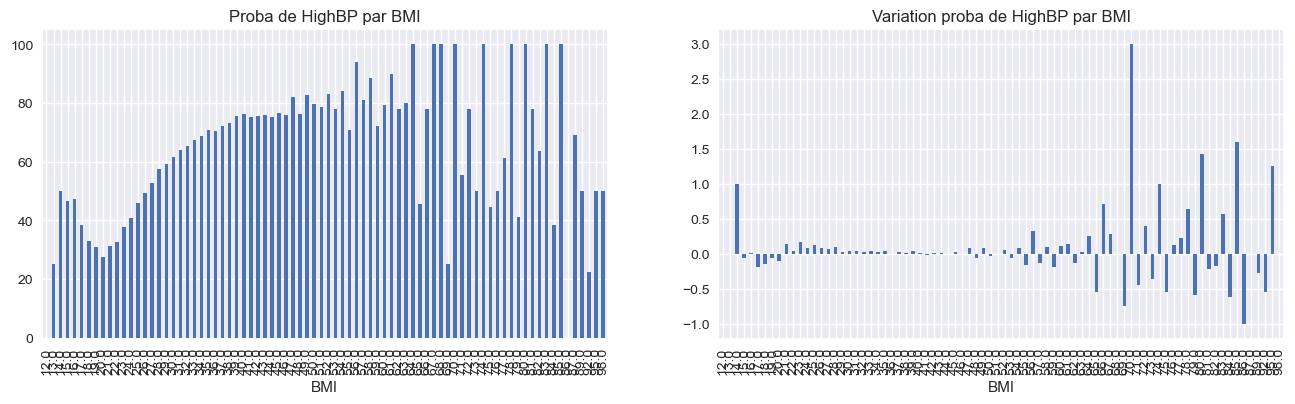

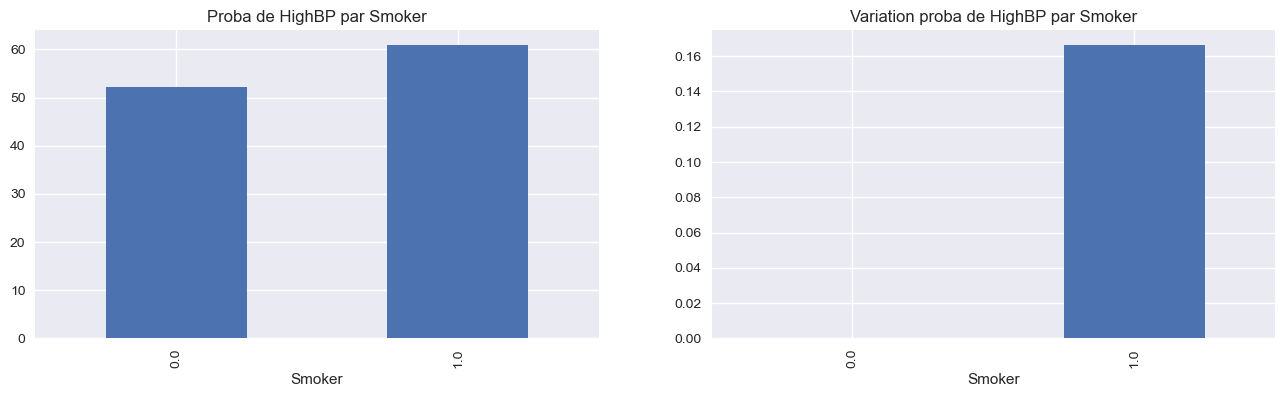

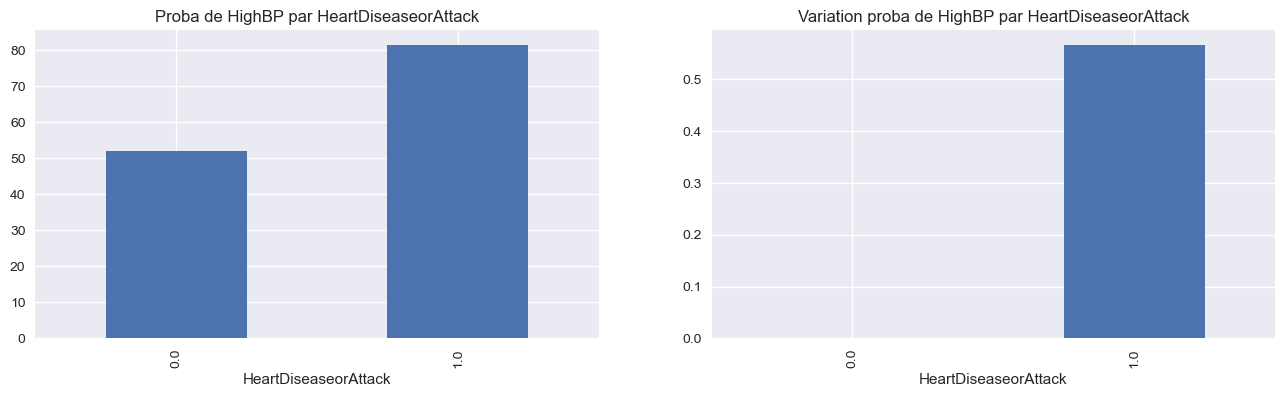

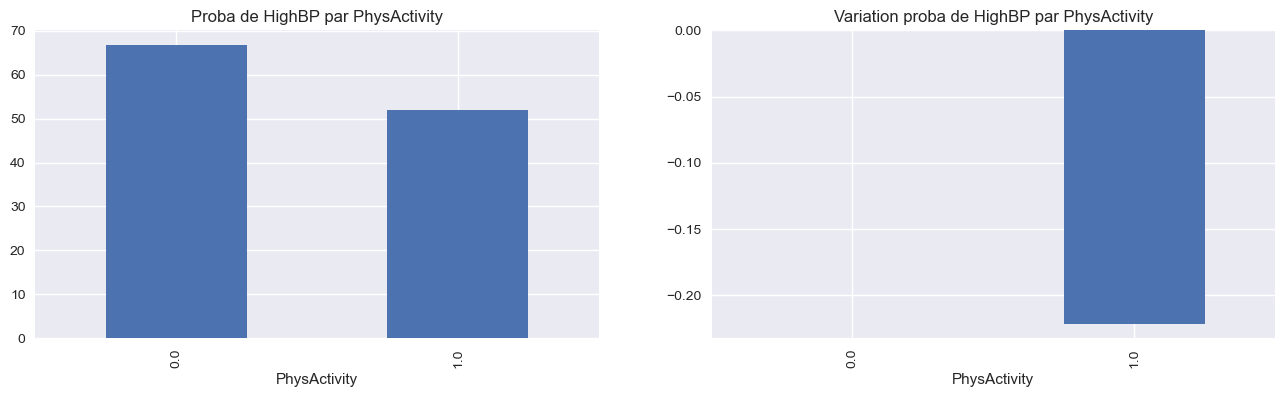

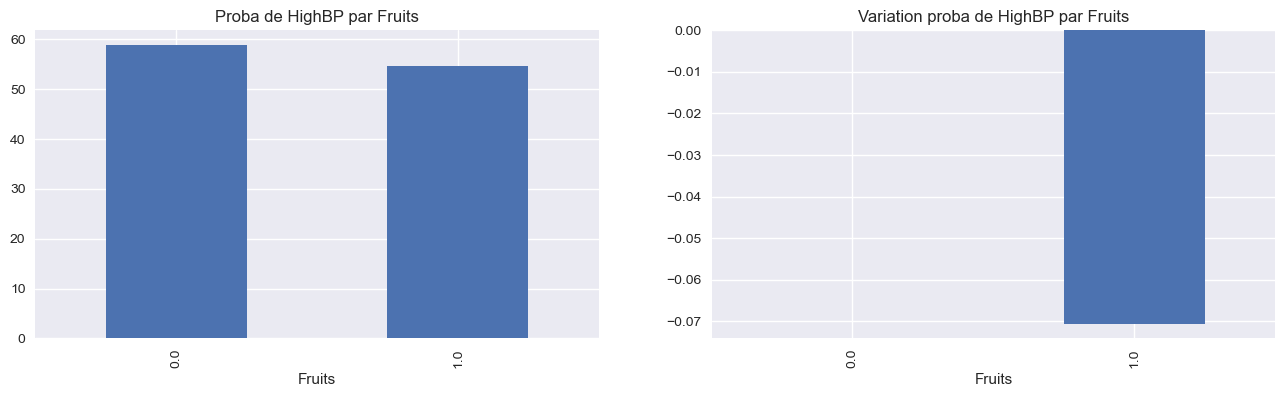

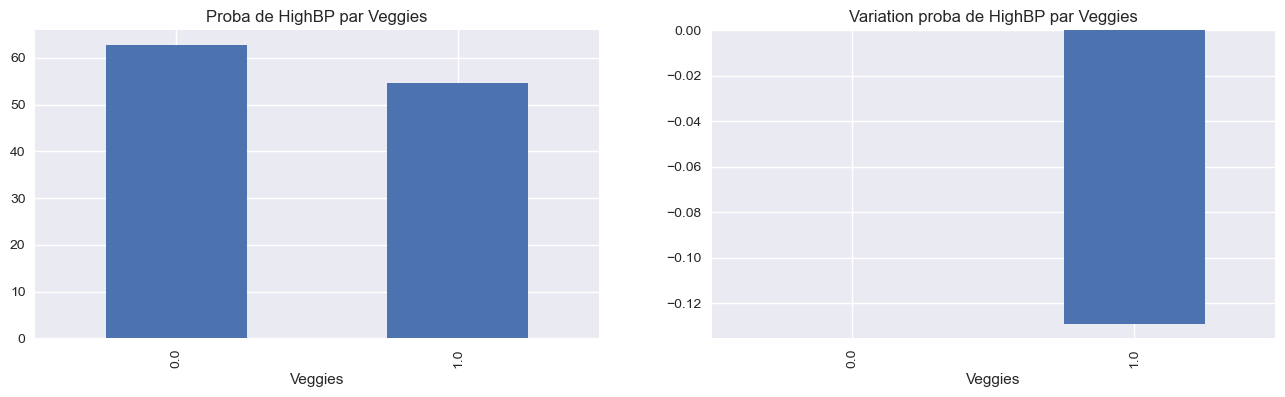

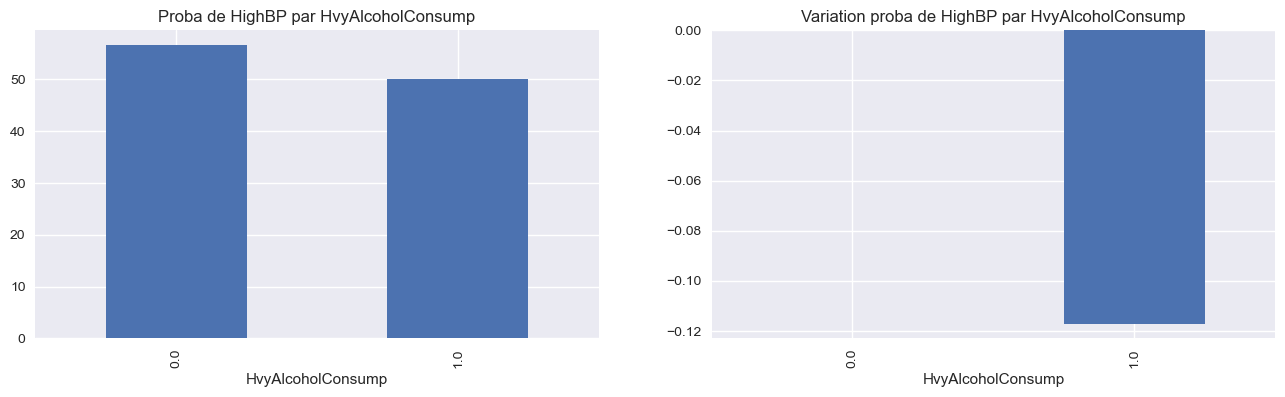

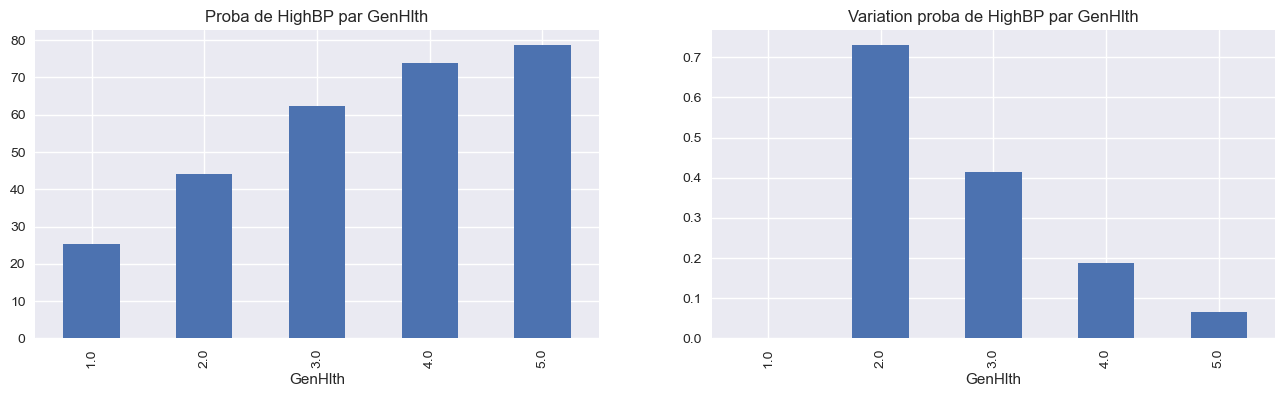

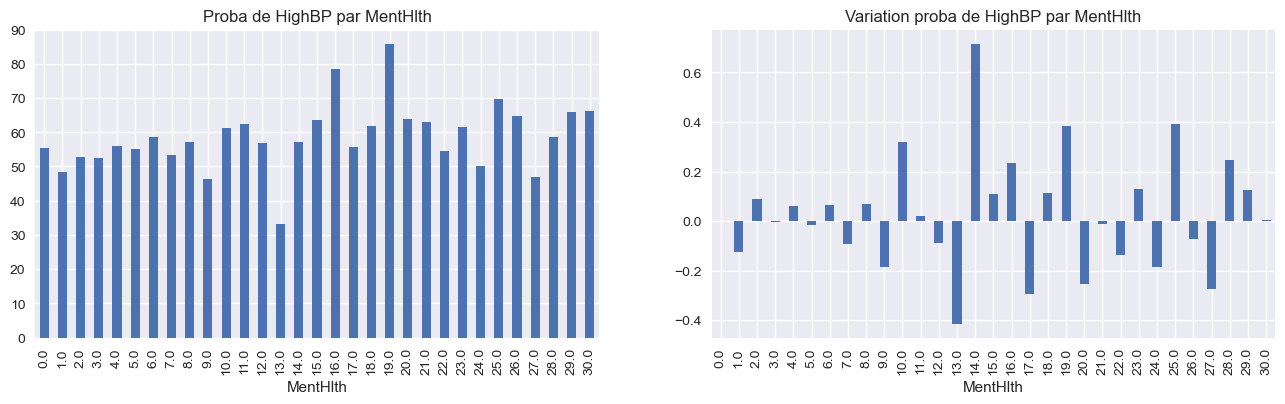

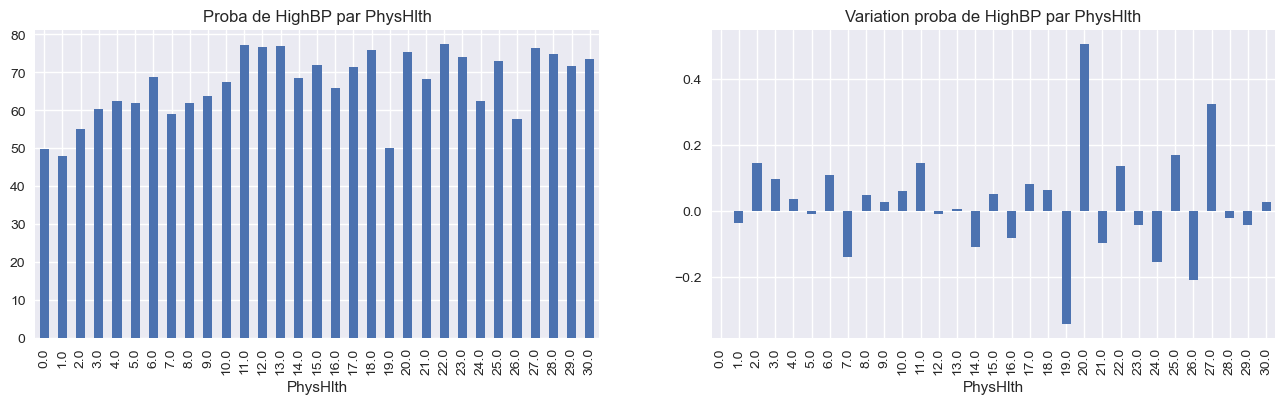

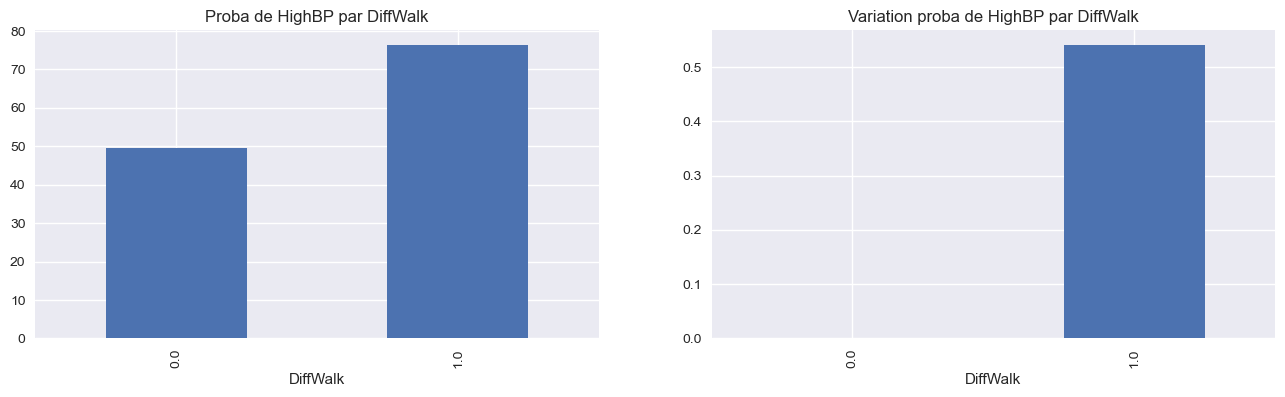

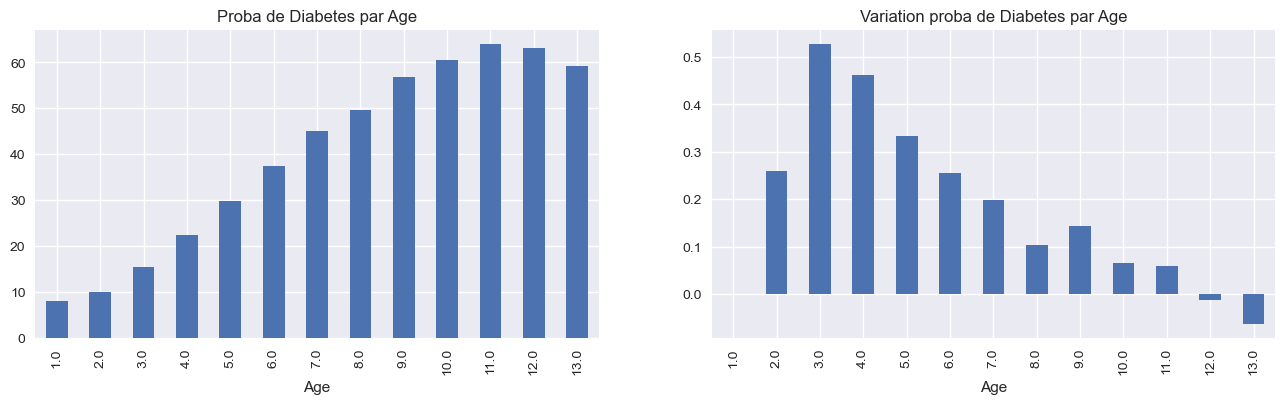

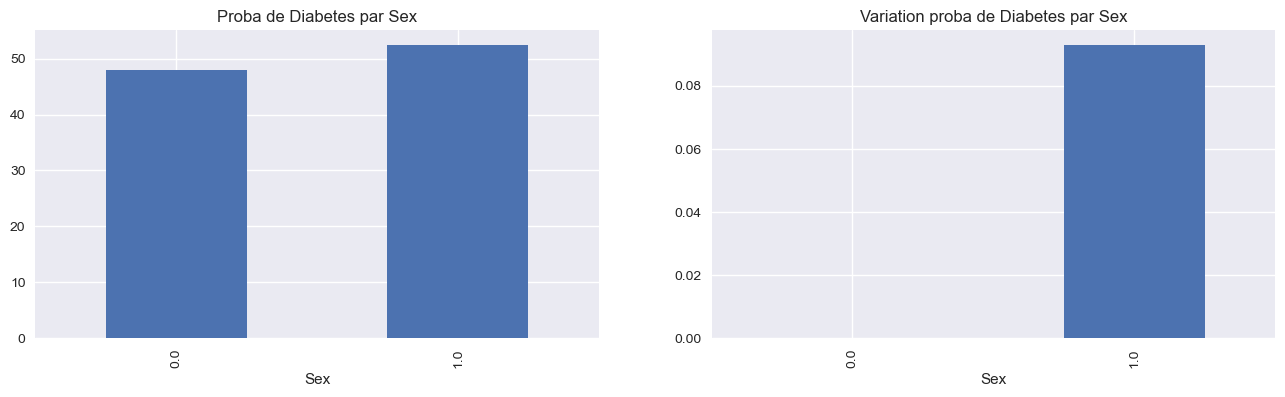

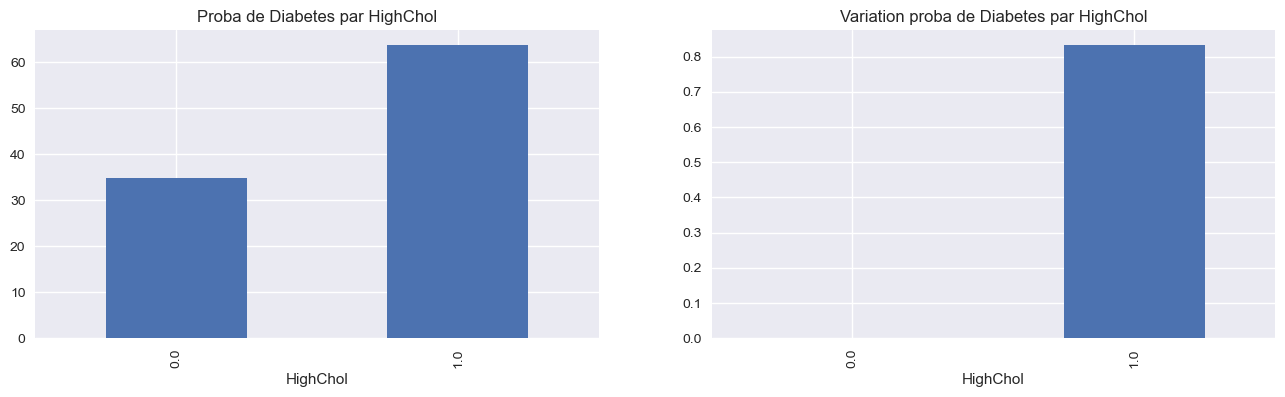

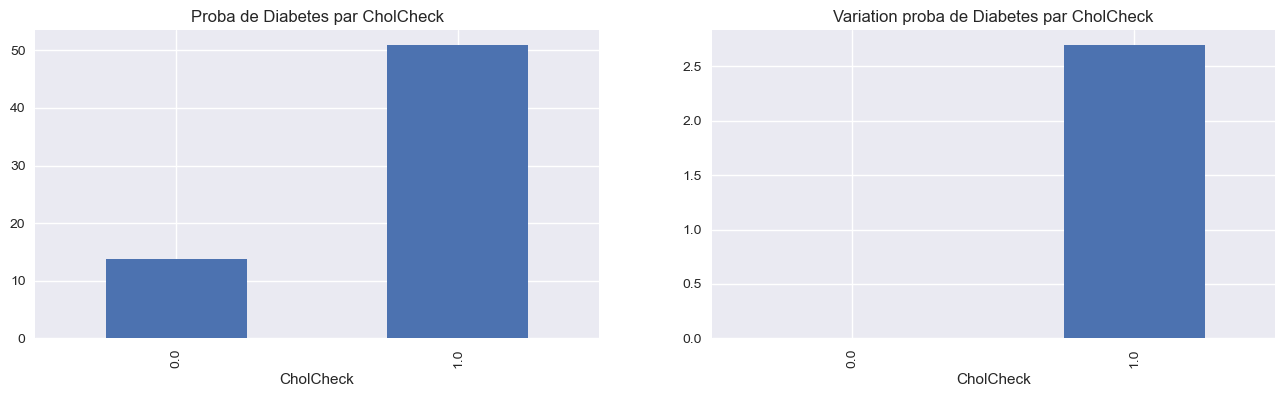

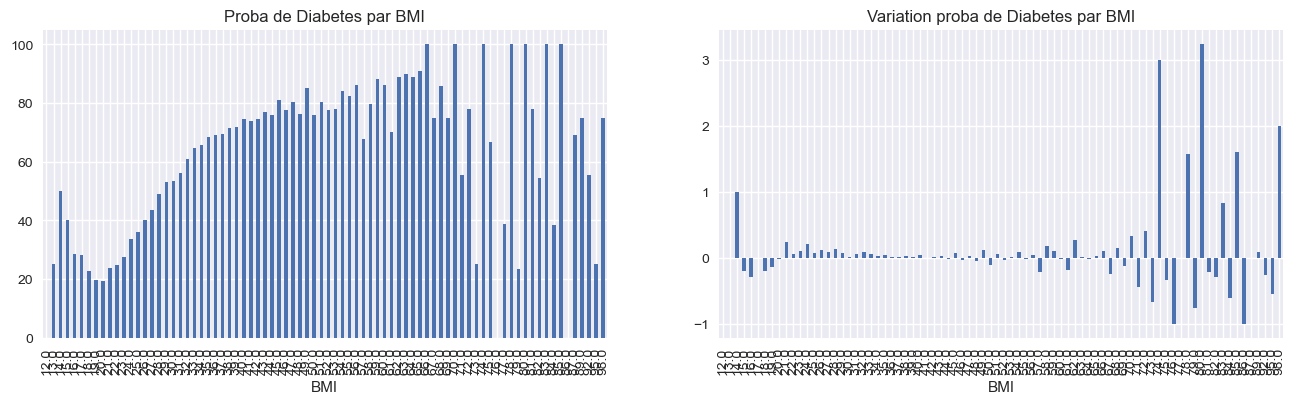

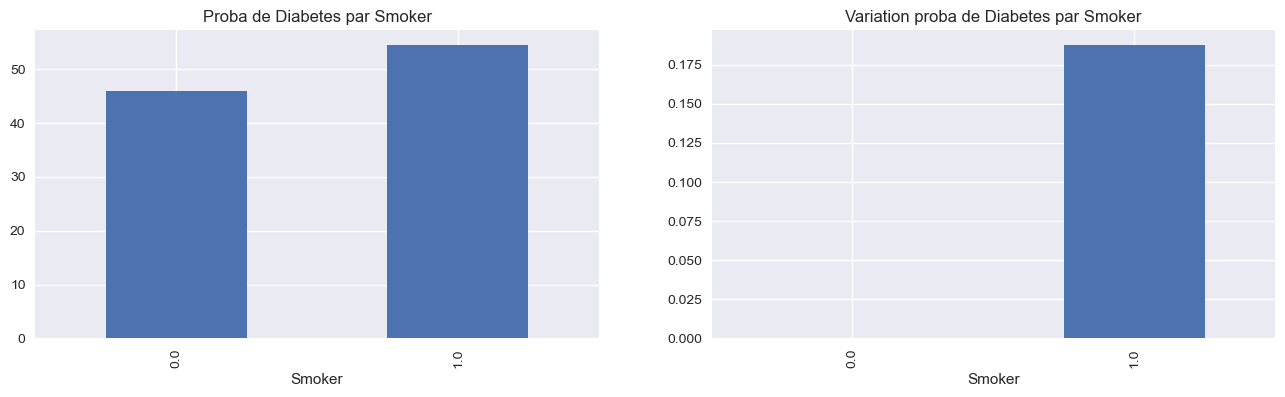

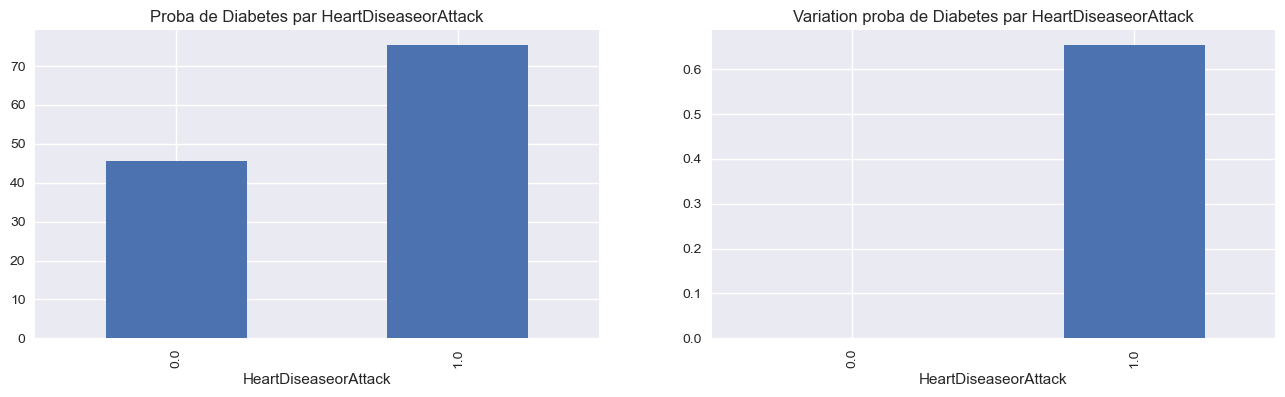

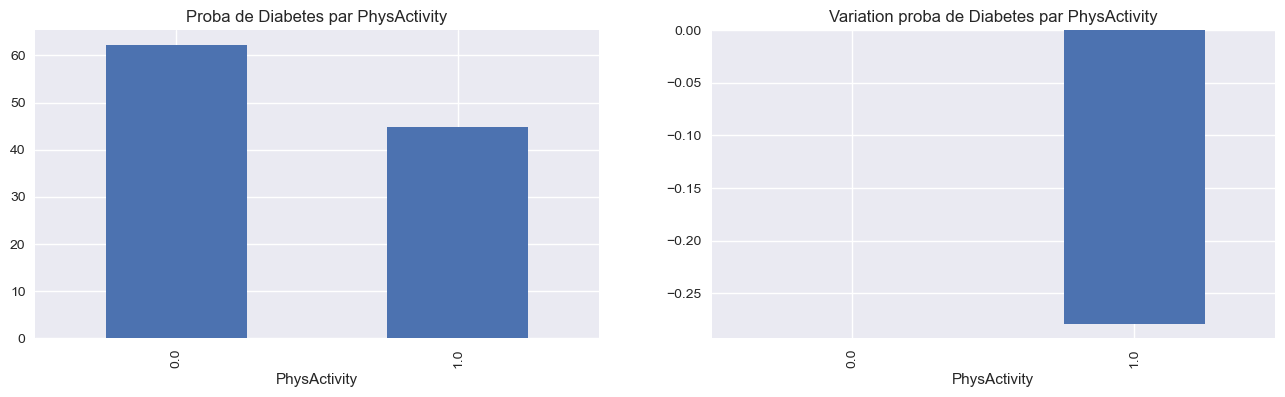

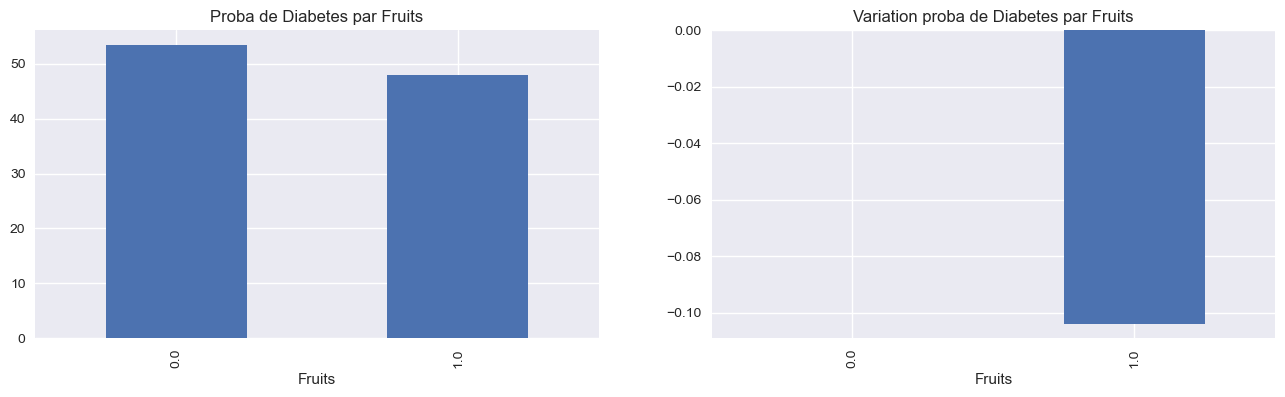

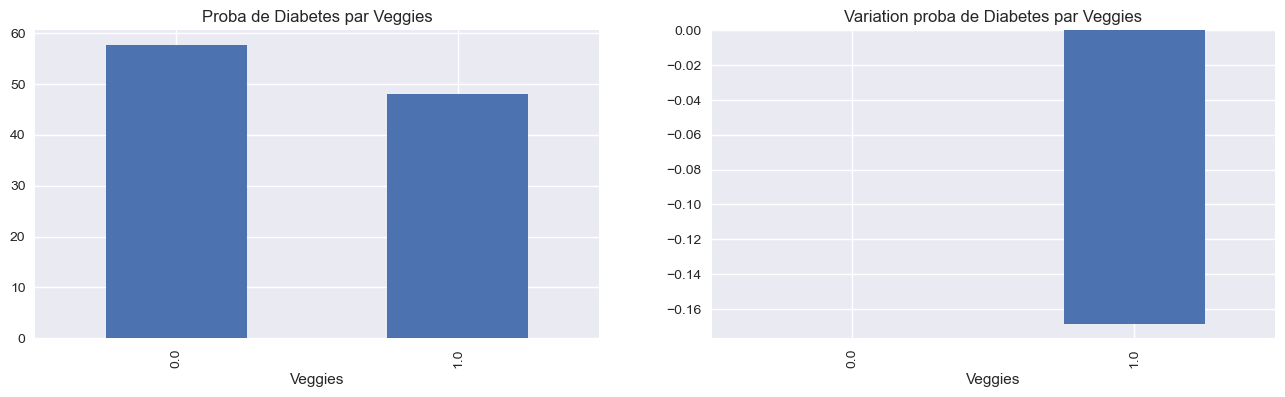

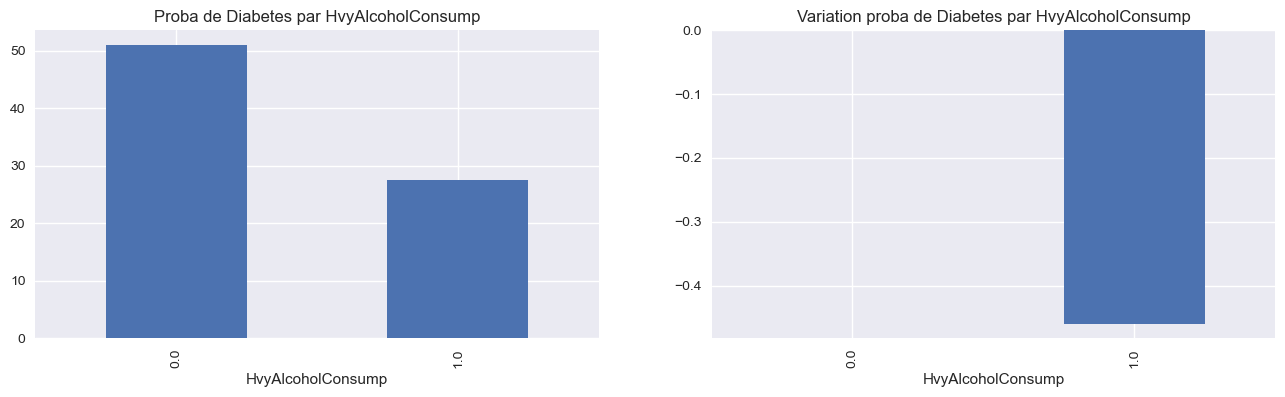

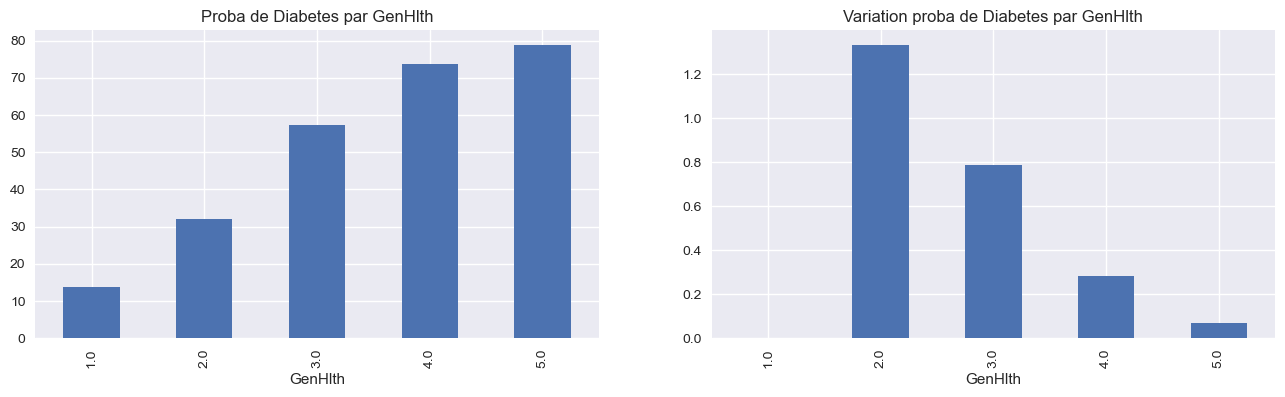

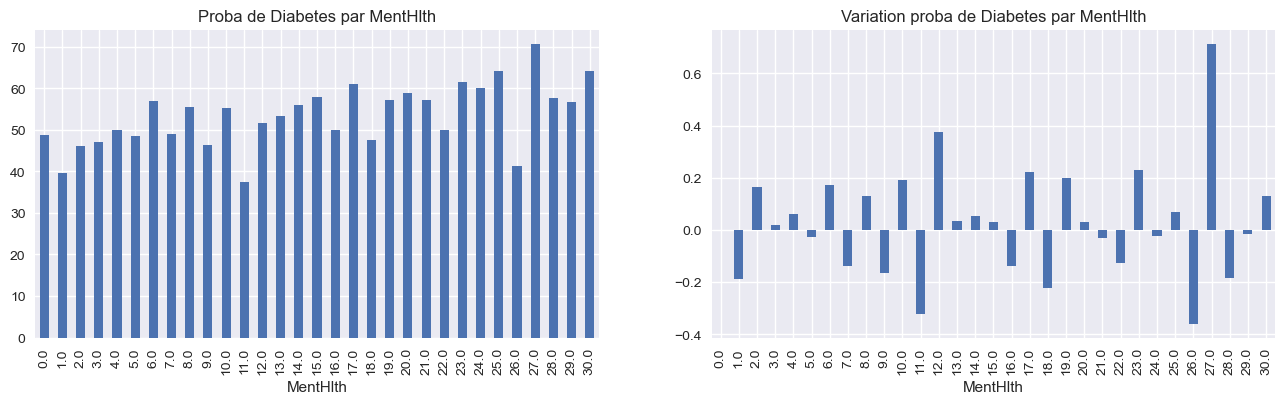

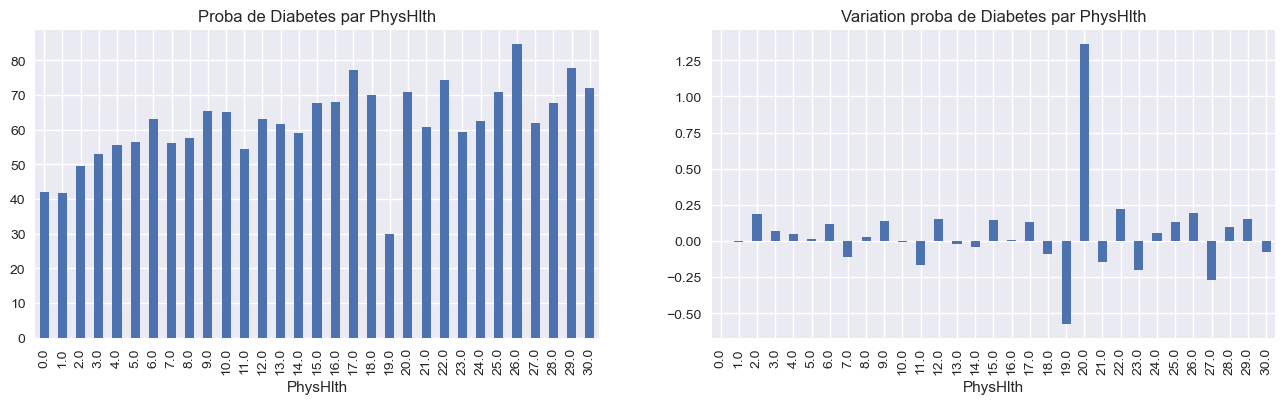

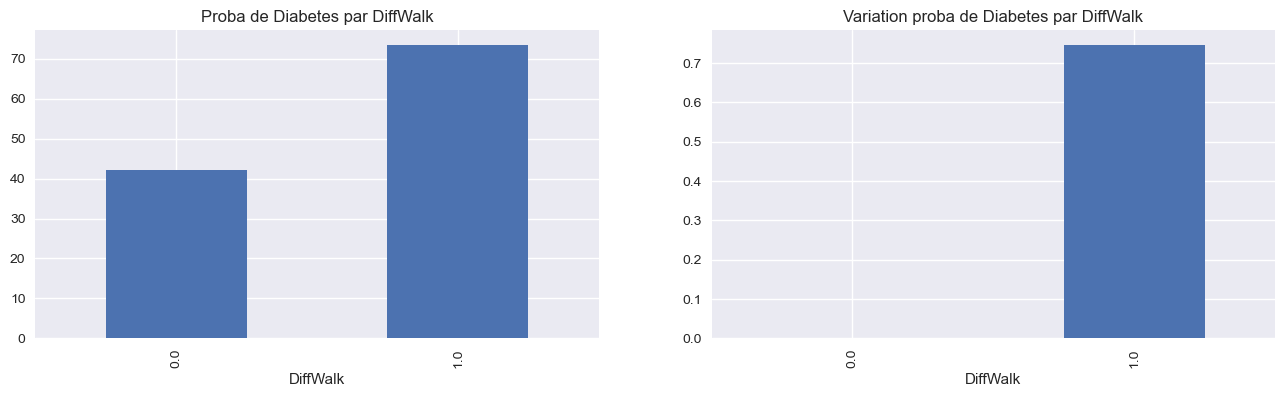

In [64]:
for i in deases_col :
    
    for j in other_col: 
        plt.figure(figsize=(16,4))
        
        plt.subplot(1,2,1)
        
        plt.title(f"Proba de {i} par {j}")
        (diabetes.groupby(j)[i].apply(lambda x : x.sum()/len(x))*100).plot.bar()

        plt.subplot(1,2,2)
        plt.title(f"Variation proba de {i} par {j}")
        (diabetes.groupby(j)[i].apply(lambda x : x.sum()/len(x))*100).pct_change().plot.bar()


        plt.show()

In [23]:
(diabetes.corr()["Stroke"].sort_values(ascending=False)[1:]*100).nlargest(3)

HeartDiseaseorAttack    22.339379
DiffWalk                19.226592
GenHlth                 18.944686
Name: Stroke, dtype: float64

In [25]:
(diabetes.corr()["HighBP"].sort_values(ascending=False)[1:]*100).nlargest(3)

Diabetes    38.151555
Age         33.813193
GenHlth     32.053981
Name: HighBP, dtype: float64

In [22]:
diabetes.corr()["Diabetes"].sort_values(ascending=False)[1:]*100

GenHlth                 40.761160
HighBP                  38.151555
BMI                     29.337274
HighChol                28.921281
Age                     27.873807
DiffWalk                27.264601
PhysHlth                21.308102
HeartDiseaseorAttack    21.152340
Stroke                  12.542678
CholCheck               11.538162
MentHlth                 8.702877
Smoker                   8.599896
Sex                      4.441286
Fruits                  -5.407656
Veggies                 -7.929315
HvyAlcoholConsump       -9.485314
PhysActivity           -15.866560
Name: Diabetes, dtype: float64

#  📍 Impact de la santé mentale : 

Croisez "MentHlth" avec d'autres variables pour évaluer son influence sur d'autres aspects de la santé. 

In [26]:
diabetes.corr()["MentHlth"].sort_values(ascending=False)[1:]*100

PhysHlth                38.027167
GenHlth                 31.507689
DiffWalk                25.148867
BMI                     10.468151
Smoker                   9.125662
Stroke                   8.730344
Diabetes                 8.702877
HighChol                 8.388071
HeartDiseaseorAttack     7.505658
HighBP                   6.429371
HvyAlcoholConsump        1.562608
CholCheck               -1.066024
Veggies                 -5.235907
Fruits                  -6.210244
Sex                     -8.920416
Age                    -10.174603
PhysActivity           -13.008951
Name: MentHlth, dtype: float64

<Axes: >

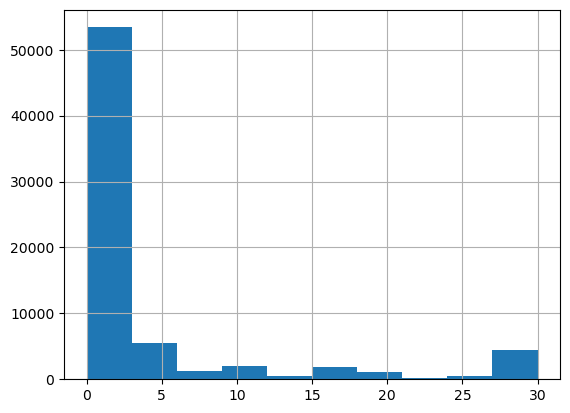

In [30]:
diabetes["MentHlth"].hist()

#  📍 Habitudes de vie et santé générale : 

Analysez "Smoker" et "HvyAlcoholConsump" avec différentes variables de santé pour évaluer les effets de ces habitudes sur la santé générale.

<Axes: >

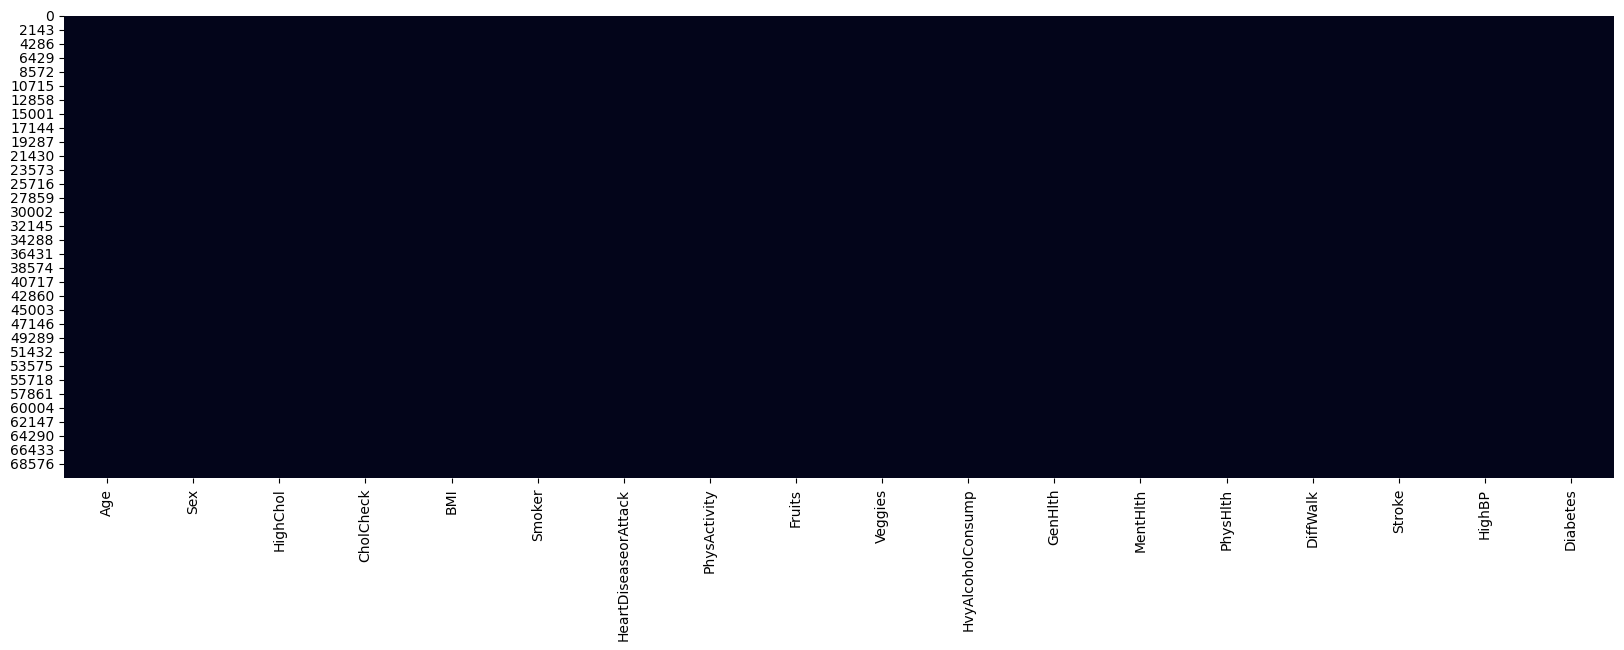

In [29]:
plt.figure(figsize=(20,6))
sns.heatmap(diabetes.isna(),cbar=False)

# 🎁  Correlation Analysis - PCA 

In [37]:
diabetes.describe().T

count       mean        std   min   25%   50%   75%  \
Age                   70692.0   8.584055   2.852153   1.0   7.0   9.0  11.0   
Sex                   70692.0   0.456997   0.498151   0.0   0.0   0.0   1.0   
HighChol              70692.0   0.525703   0.499342   0.0   0.0   1.0   1.0   
CholCheck             70692.0   0.975259   0.155336   0.0   1.0   1.0   1.0   
BMI                   70692.0  29.856985   7.113954  12.0  25.0  29.0  33.0   
Smoker                70692.0   0.475273   0.499392   0.0   0.0   0.0   1.0   
HeartDiseaseorAttack  70692.0   0.147810   0.354914   0.0   0.0   0.0   0.0   
PhysActivity          70692.0   0.703036   0.456924   0.0   0.0   1.0   1.0   
Fruits                70692.0   0.611795   0.487345   0.0   0.0   1.0   1.0   
Veggies               70692.0   0.788774   0.408181   0.0   1.0   1.0   1.0   
HvyAlcoholConsump     70692.0   0.042721   0.202228   0.0   0.0   0.0   0.0   
GenHlth               70692.0   2.837082   1.113565   1.0   2.0   3.0   4.0   
MentHlth              70692.0   3.752037   8.155627   0.0   0.0   0.0   2.0   
PhysHlth              70692.0   5.810417  10.062261   0.0   0.0   0.0   6.0   
DiffWalk              70692.0   0.252730   0.434581   0.0   0.0   0.0   1.0   
Stroke                70692.0   0.062171   0.241468   0.0   0.0   0.0   0.0   
HighBP                70692.0   0.563458   0.495960   0.0   0.0   1.0   1.0   
Diabetes              70692.0   0.500000   0.500004   0.0   0.0   0.5   1.0   

                       max  
Age                   13.0  
Sex                    1.0  
HighChol               1.0  
CholCheck              1.0  
BMI                   98.0  
Smoker                 1.0  
HeartDiseaseorAttack   1.0  
PhysActivity           1.0  
Fruits                 1.0  
Veggies                1.0  
HvyAlcoholConsump      1.0  
GenHlth                5.0  
MentHlth              30.0  
PhysHlth              30.0  
DiffWalk               1.0  
Stroke                 1.0  
HighBP                 1.0  
Diabetes               1.0

<Axes: >

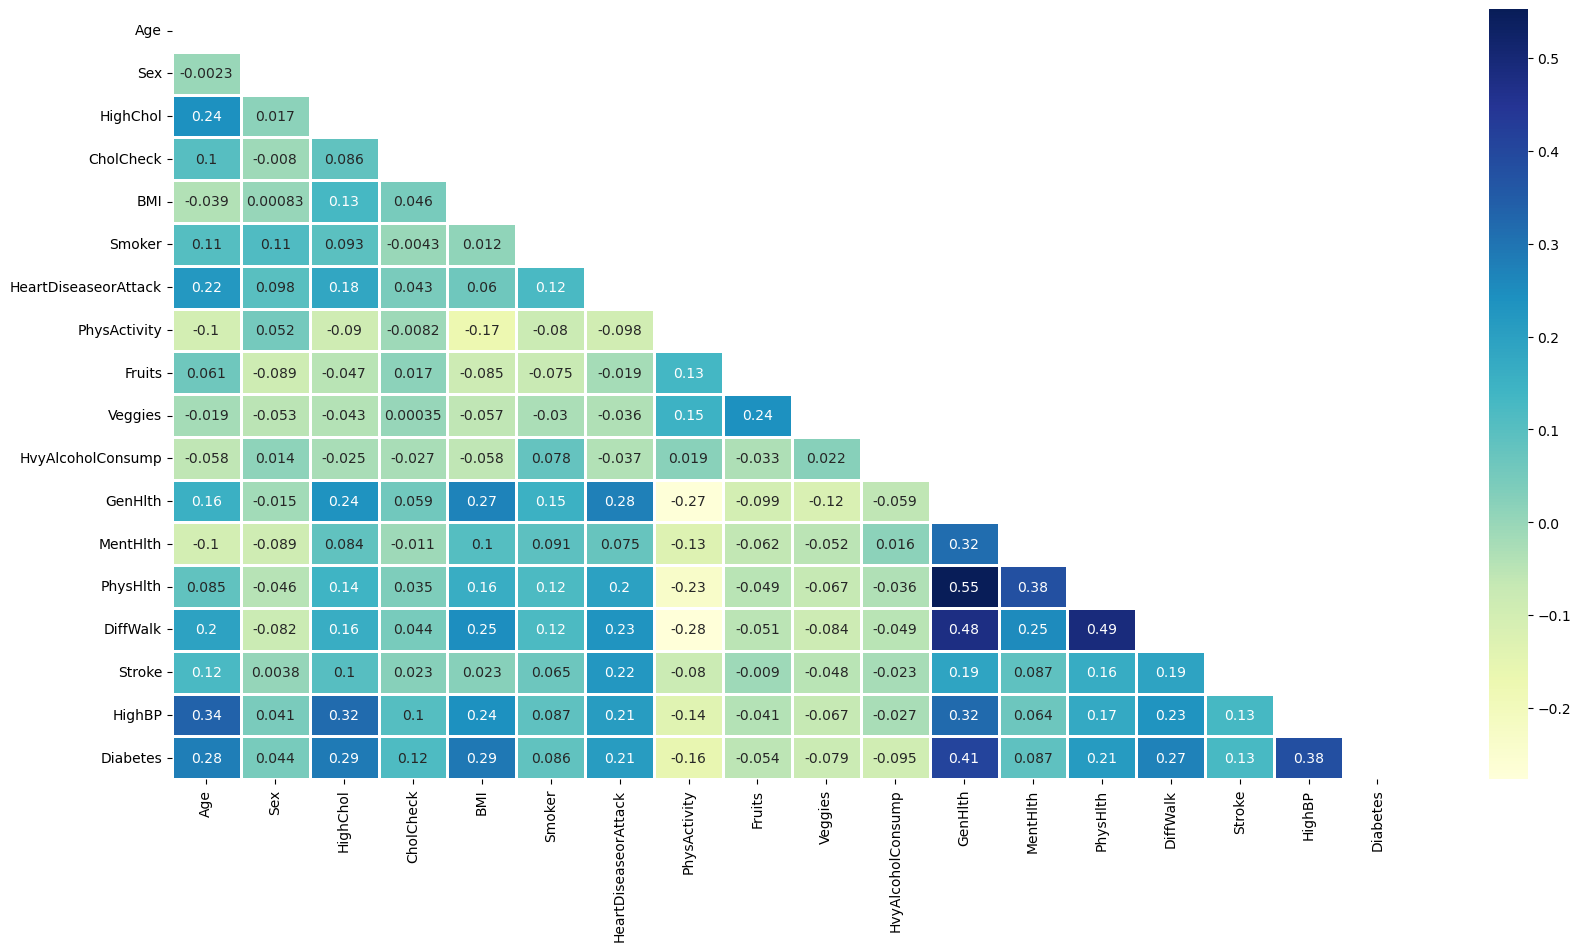

In [151]:
plt.figure(figsize=(20,10))

# creating mask
mask = np.triu(np.ones_like(diabetes.corr()))
 
# plotting a triangle correlation heatmap
sns.heatmap(diabetes.corr(),annot=True,cbar=True,cmap="YlGnBu",linewidth=0.8,mask=mask)


In [9]:
from sklearn.decomposition import PCA

In [10]:
def scaler(X):
    return (X-X.mean())/X.std()

In [152]:
def runPCA(X):
    # On pose le modèle
    X_scaled = scaler(X)
    pca = PCA()
    pca.fit(X_scaled)
    exp_var = pd.Series(pca.explained_variance_ratio_,name='ratio')*100
    
    print("="*100)
    print("PCA ratio de variance expliqué par composante")
    print((exp_var.to_frame())\
          		   .join(exp_var.cumsum().to_frame(name='cumsum_ratio')))
    print("="*100)
    
    plt.figure(figsize=(18,8))
    
    plt.subplot(1,2,1)
    plt.title("PCA ratio de variance expliqué par composante")
    plt.plot(pca.explained_variance_ratio_.cumsum()*100,marker='o')
    exp_var.plot(kind="bar", alpha=1) # plot bar chart
    
    
    
    pca = PCA(2)
    pca.fit(X_scaled)
    
    plt.subplot(1,2,2)
    plt.title("Projection 2d PCA")
    
    X_transformed = pca.fit_transform(X_scaled)
    
    pca_x = X_transformed[:,0]
    pca_y = X_transformed[:,1]
    
    plt.scatter(pca_x,pca_y)
    
    plt.show()
    
    (fig, ax) = plt.subplots(figsize=(10,10))
    
    for i in range(0, pca.components_.shape[1]):
        ax.arrow(0,
                     0,  # Start the arrow at the origin
                     pca.components_[0, i],  #0 for PC1
                     pca.components_[1, i],  #1 for PC2
                     head_width=0.1,
                     head_length=0.1)
        plt.text(pca.components_[0, i] + 0.05,
                     pca.components_[1, i] + 0.05,
                     X_scaled.columns.values[i])

    plt.xlabel(f'component 1 - {str(pca.explained_variance_ratio_[0]*100)[:4]} %')
    plt.ylabel(f'component 2 - {str(pca.explained_variance_ratio_[1]*100)[:4]} %')
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
    plt.axis('equal')
    ax.set_title('Cercle de corrélation : explication des composantes par facteur')
    plt.show()
    
    return pca_x,pca_y
    

PCA ratio de variance expliqué par composante
        ratio  cumsum_ratio
0   19.350763     19.350763
1    8.694611     28.045374
2    7.279904     35.325279
3    6.711802     42.037081
4    5.807427     47.844508
5    5.555926     53.400434
6    5.280130     58.680564
7    4.986822     63.667386
8    4.812310     68.479696
9    4.427760     72.907456
10   4.195569     77.103025
11   4.039925     81.142950
12   3.941479     85.084429
13   3.609138     88.693567
14   3.408296     92.101863
15   3.058334     95.160196
16   2.657737     97.817934
17   2.182066    100.000000


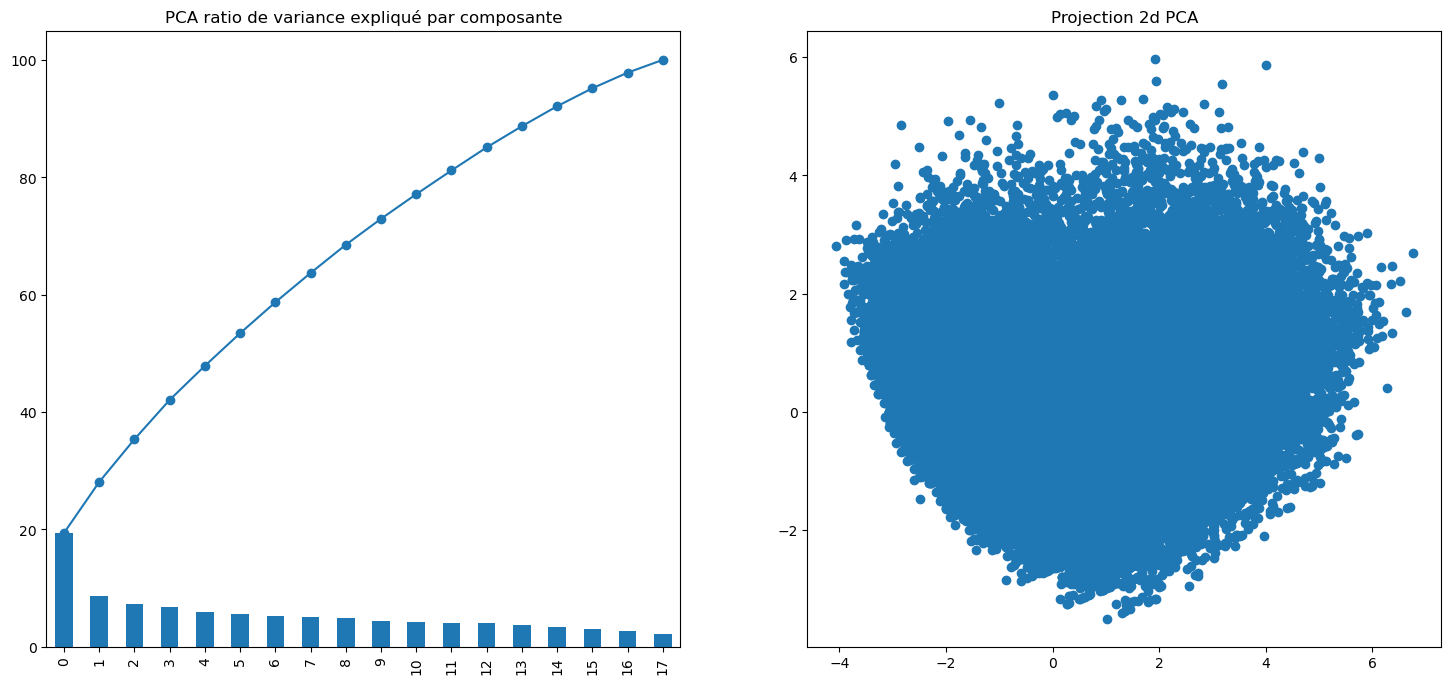

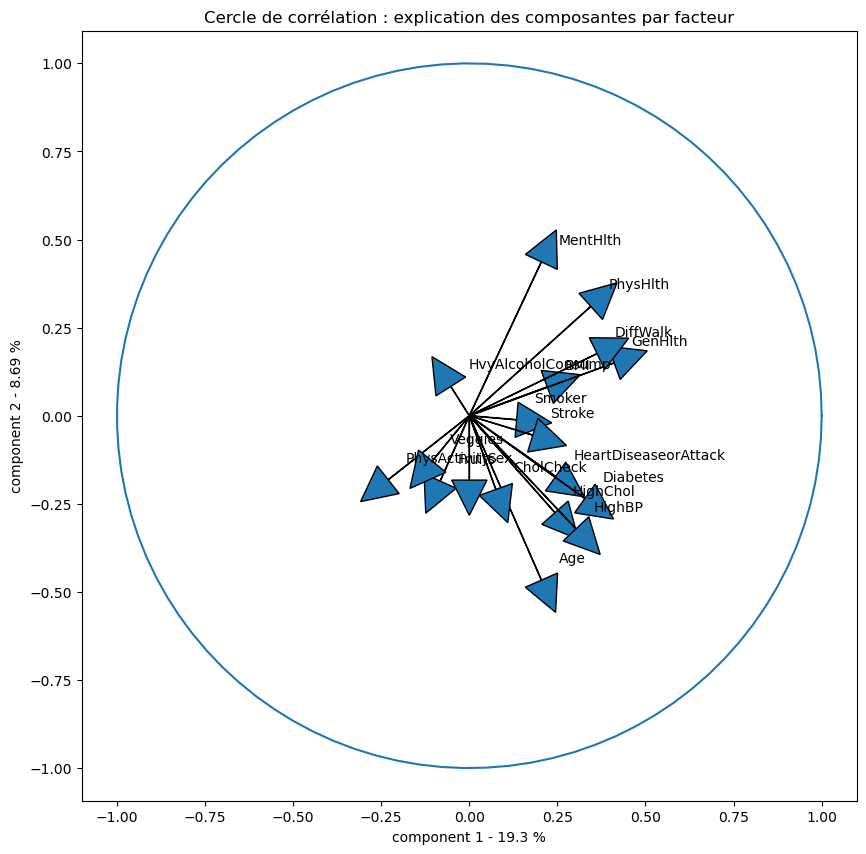

In [154]:
pca_x,pca_y = runPCA(diabetes)

In [156]:
## Add PCA component to dataset
diabetes["pca_x"] = pca_x
diabetes["pca_y"] = pca_y

In [158]:
diabetes.head(2)

Age  Sex  HighChol  CholCheck   BMI  Smoker  HeartDiseaseorAttack  \
0   4.0  1.0       0.0        1.0  26.0     0.0                   0.0   
1  12.0  1.0       1.0        1.0  26.0     1.0                   0.0   

   PhysActivity  Fruits  Veggies  HvyAlcoholConsump  GenHlth  MentHlth  \
0           1.0     0.0      1.0                0.0      3.0       5.0   
1           0.0     1.0      0.0                0.0      3.0       0.0   

   PhysHlth  DiffWalk  Stroke  HighBP  Diabetes     pca_x     pca_y  
0      30.0       0.0     0.0     1.0       0.0 -0.410200  1.546858  
1       0.0       0.0     1.0     1.0       0.0  1.101958 -1.437352

## T-SNE 

In [103]:
from sklearn.manifold import TSNE

In [124]:
tsne_model = TSNE(n_components=2, learning_rate='auto',init='random')

In [125]:
diabetes_projected = tsne_model.fit_transform(diabetes)

In [126]:
diabetes_projected = pd.DataFrame(diabetes_projected,columns =['TSNE_1','TSNE_2'])

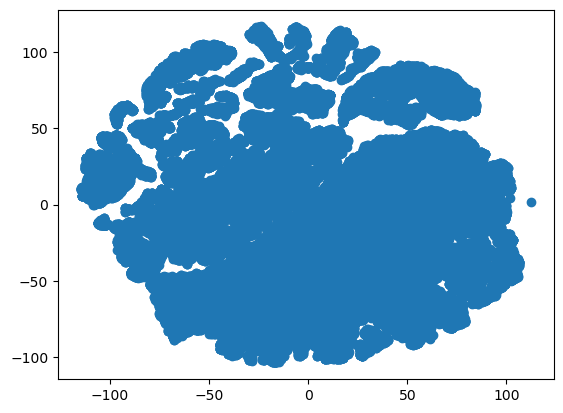

In [127]:
plt.scatter(diabetes_projected['TSNE_1'],diabetes_projected['TSNE_2'])

In [160]:
diabetes["tsne_x"] = diabetes_projected['TSNE_1']
diabetes["tsne_y"] = diabetes_projected['TSNE_2']

In [162]:
diabetes.head(2)

Age  Sex  HighChol  CholCheck   BMI  Smoker  HeartDiseaseorAttack  \
0   4.0  1.0       0.0        1.0  26.0     0.0                   0.0   
1  12.0  1.0       1.0        1.0  26.0     1.0                   0.0   

   PhysActivity  Fruits  Veggies  ...  MentHlth  PhysHlth  DiffWalk  Stroke  \
0           1.0     0.0      1.0  ...       5.0      30.0       0.0     0.0   
1           0.0     1.0      0.0  ...       0.0       0.0       0.0     1.0   

   HighBP  Diabetes     pca_x     pca_y     tsne_x     tsne_y  
0     1.0       0.0 -0.410200  1.546858  49.879986  52.432255  
1     1.0       0.0  1.101958 -1.437352  21.538467  16.743971  

[2 rows x 22 columns]

## U-MAP 

In [128]:
import umap

//anaconda3/envs/proj/lib/python3.11/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
//anaconda3/envs/proj/lib/python3.11/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
//anaconda3/envs/proj/lib/python3.11/site-packages/umap/distances.py:1086: NumbaDeprecationWarni

In [129]:
umap_model = umap.UMAP(n_components=2)

In [130]:
umap_result = umap_model.fit_transform(diabetes)

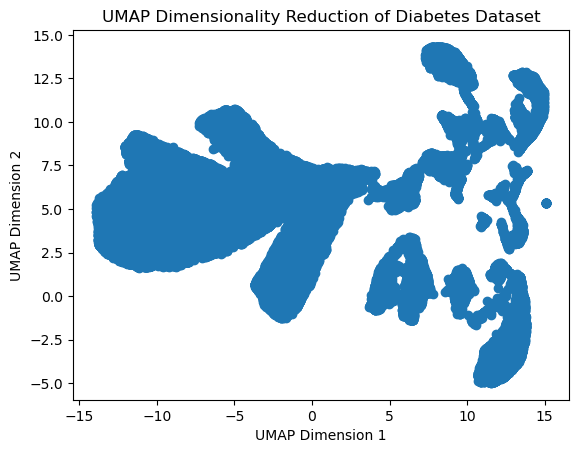

In [136]:
plt.scatter(umap_result[:, 0], umap_result[:, 1])

plt.title('UMAP Dimensionality Reduction of Diabetes Dataset')

plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')

plt.show()

In [163]:
diabetes["umap_x"] = umap_result[:, 0]
diabetes["umap_y"] = umap_result[:, 1]

In [164]:
diabetes.head(2)

Age  Sex  HighChol  CholCheck   BMI  Smoker  HeartDiseaseorAttack  \
0   4.0  1.0       0.0        1.0  26.0     0.0                   0.0   
1  12.0  1.0       1.0        1.0  26.0     1.0                   0.0   

   PhysActivity  Fruits  Veggies  ...  DiffWalk  Stroke  HighBP  Diabetes  \
0           1.0     0.0      1.0  ...       0.0     0.0     1.0       0.0   
1           0.0     1.0      0.0  ...       0.0     1.0     1.0       0.0   

      pca_x     pca_y     tsne_x     tsne_y     umap_x    umap_y  
0 -0.410200  1.546858  49.879986  52.432255  11.300872 -2.966663  
1  1.101958 -1.437352  21.538467  16.743971  -9.586177  2.114960  

[2 rows x 24 columns]

In [165]:
os.getcwd()

'/Users/adham/Desktop/PST/Capstone/CAPSTONE DATA/dataset'

In [167]:
diabetes.to_excel('data_projected.xlsx',index=False)

# RE-IMPORT DATA

In [5]:
os.getcwd()

'/Users/adham/Desktop/PST/Capstone/CAPSTONE DATA'

In [6]:
os.chdir('dataset')

In [51]:
diabetes = pd.read_excel('data_projected.xlsx')

In [52]:
diabetes.head(2)

Age  Sex  HighChol  CholCheck  BMI  Smoker  HeartDiseaseorAttack  \
0    4    1         0          1   26       0                     0   
1   12    1         1          1   26       1                     0   

   PhysActivity  Fruits  Veggies  HvyAlcoholConsump  GenHlth  MentHlth  \
0             1       0        1                  0        3         5   
1             0       1        0                  0        3         0   

   PhysHlth  DiffWalk  Stroke  HighBP  Diabetes     pca_x     pca_y  \
0        30         0       0       1         0 -0.410200  1.546858   
1         0         0       1       1         0  1.101958 -1.437352   

      tsne_x     tsne_y     umap_x    umap_y  
0  49.879986  52.432255  11.300872 -2.966663  
1  21.538467  16.743971  -9.586177  2.114960

In [11]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  int64  
 1   Sex                   70692 non-null  int64  
 2   HighChol              70692 non-null  int64  
 3   CholCheck             70692 non-null  int64  
 4   BMI                   70692 non-null  int64  
 5   Smoker                70692 non-null  int64  
 6   HeartDiseaseorAttack  70692 non-null  int64  
 7   PhysActivity          70692 non-null  int64  
 8   Fruits                70692 non-null  int64  
 9   Veggies               70692 non-null  int64  
 10  HvyAlcoholConsump     70692 non-null  int64  
 11  GenHlth               70692 non-null  int64  
 12  MentHlth              70692 non-null  int64  
 13  PhysHlth              70692 non-null  int64  
 14  DiffWalk              70692 non-null  int64  
 15  Stroke             

In [8]:
diabetes.corr()

Age       Sex  HighChol  CholCheck       BMI  \
Age                   1.000000 -0.002315  0.240338   0.101743 -0.038648   
Sex                  -0.002315  1.000000  0.017324  -0.007991  0.000827   
HighChol              0.240338  0.017324  1.000000   0.085981  0.131309   
CholCheck             0.101743 -0.007991  0.085981   1.000000  0.045648   
BMI                  -0.038648  0.000827  0.131309   0.045648  1.000000   
Smoker                0.105424  0.112125  0.093398  -0.004331  0.011551   
HeartDiseaseorAttack  0.221878  0.098161  0.181187   0.043497  0.060355   
PhysActivity         -0.100753  0.051753 -0.090453  -0.008249 -0.170936   
Fruits                0.061096 -0.088723 -0.047384   0.017384 -0.084505   
Veggies              -0.018893 -0.052604 -0.042836   0.000349 -0.056528   
HvyAlcoholConsump    -0.057705  0.014164 -0.025443  -0.027146 -0.058232   
GenHlth               0.155624 -0.014555  0.237778   0.059213  0.267888   
MentHlth             -0.101746 -0.089204  0.083881  -0.010660  0.104682   
PhysHlth              0.084852 -0.045957  0.142610   0.034540  0.161862   
DiffWalk              0.195265 -0.082248  0.162043   0.044430  0.246094   
Stroke                0.123879  0.003822  0.099786   0.022529  0.022931   
HighBP                0.338132  0.040819  0.316515   0.103283  0.241019   
Diabetes              0.278738  0.044413  0.289213   0.115382  0.293373   
pca_x                 0.382144  0.000090  0.453806   0.140516  0.412695   
pca_y                -0.583592 -0.228528 -0.344255  -0.261794  0.102301   
tsne_x               -0.072237  0.016513 -0.172490  -0.041336 -0.627662   
tsne_y                0.338499 -0.109314  0.162283   0.041772 -0.056962   
umap_x                0.019728 -0.062735  0.175740   0.032012  0.413660   
umap_y               -0.389211 -0.036264 -0.091369  -0.057728  0.089330   

                        Smoker  HeartDiseaseorAttack  PhysActivity    Fruits  \
Age                   0.105424              0.221878     -0.100753  0.061096   
Sex                   0.112125              0.098161      0.051753 -0.088723   
HighChol              0.093398              0.181187     -0.090453 -0.047384   
CholCheck            -0.004331              0.043497     -0.008249  0.017384   
BMI                   0.011551              0.060355     -0.170936 -0.084505   
Smoker                1.000000              0.124418     -0.079823 -0.074811   
HeartDiseaseorAttack  0.124418              1.000000     -0.098223 -0.019436   
PhysActivity         -0.079823             -0.098223      1.000000  0.133813   
Fruits               -0.074811             -0.019436      0.133813  1.000000   
Veggies              -0.029926             -0.036315      0.149322  0.238605   
HvyAlcoholConsump     0.077835             -0.037130      0.019111 -0.033246   
GenHlth               0.152416              0.275868     -0.273548 -0.098687   
MentHlth              0.091257              0.075057     -0.130090 -0.062102   
PhysHlth              0.120698              0.198416     -0.234500 -0.048572   
DiffWalk              0.119789              0.232611     -0.276868 -0.050784   
Stroke                0.064658              0.223394     -0.079985 -0.008996   
HighBP                0.087438              0.210750     -0.136102 -0.040852   
Diabetes              0.085999              0.211523     -0.158666 -0.054077   
pca_x                 0.250510              0.457182     -0.429435 -0.154603   
pca_y                -0.014427             -0.215808     -0.227355 -0.231963   
tsne_x               -0.067168             -0.079425      0.145778  0.085954   
tsne_y                0.133240              0.202715     -0.182726 -0.006824   
umap_x                0.120919              0.183391     -0.250851 -0.084564   
umap_y               -0.042491             -0.122666      0.052264 -0.034078   

                       Veggies  ...  DiffWalk    Stroke    HighBP  Diabetes  \
Age                  -0.018893  ...  0.195265  0.123879  0.338132  0.27

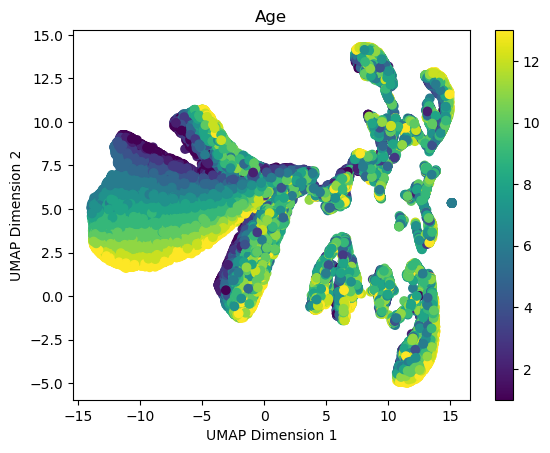

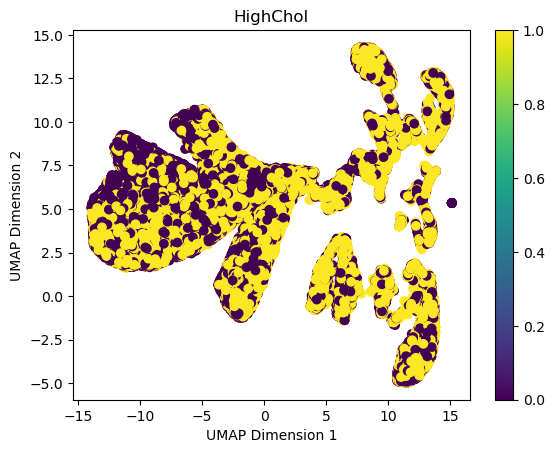

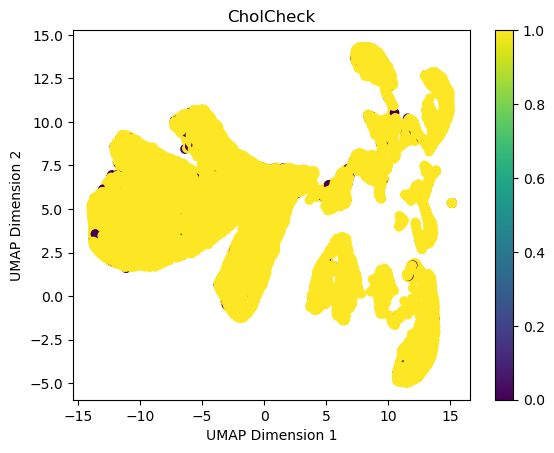

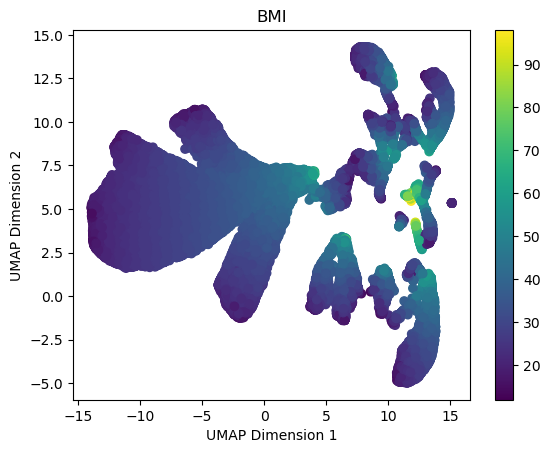

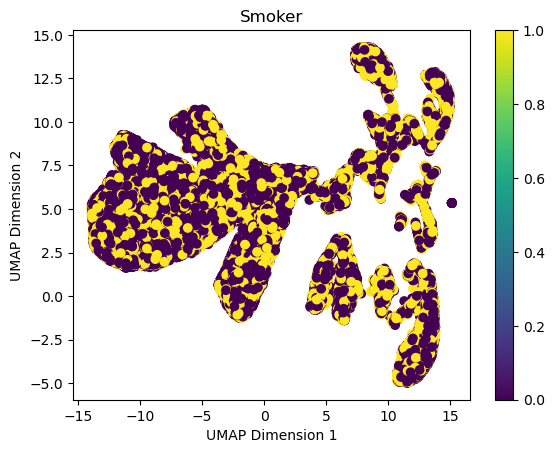

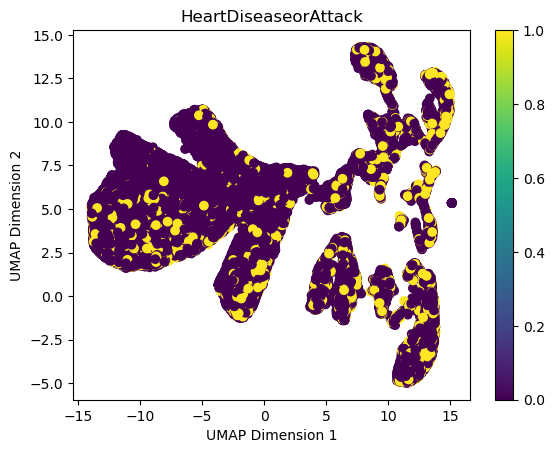

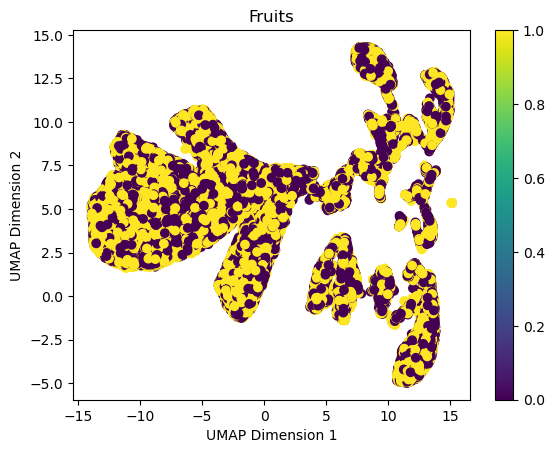

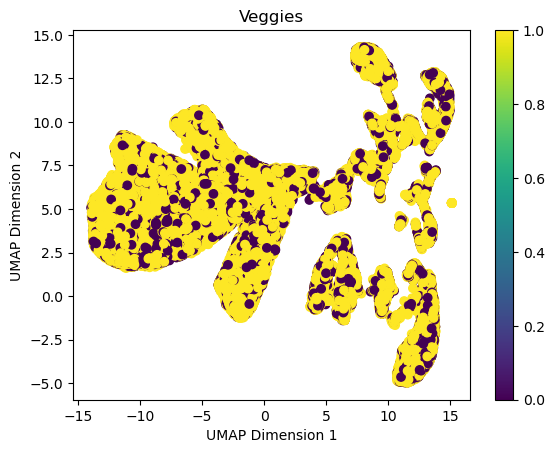

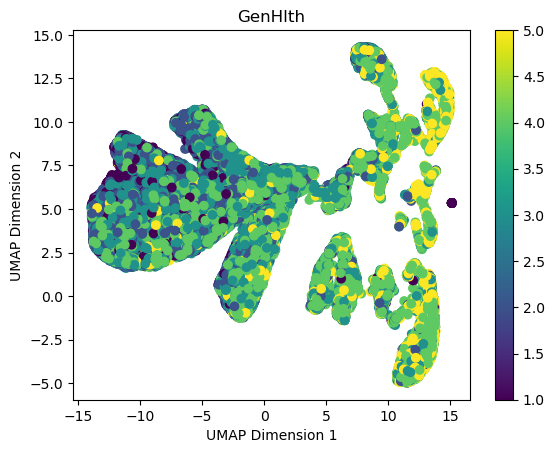

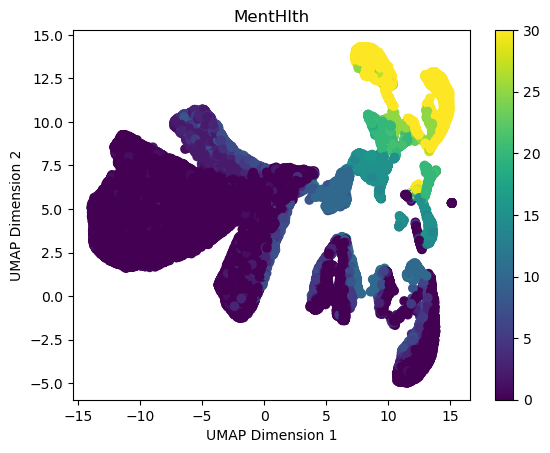

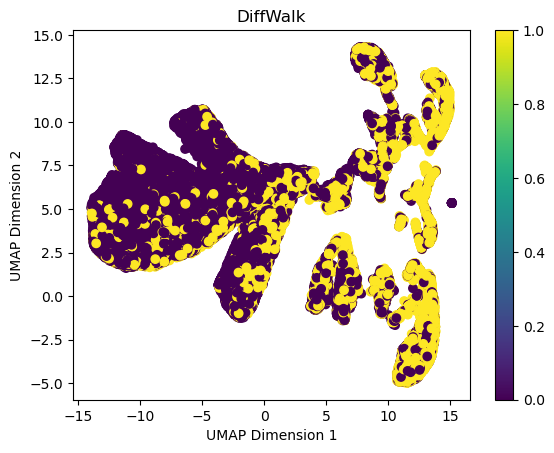

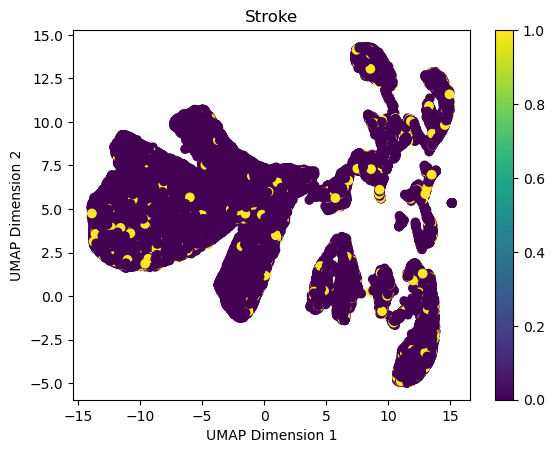

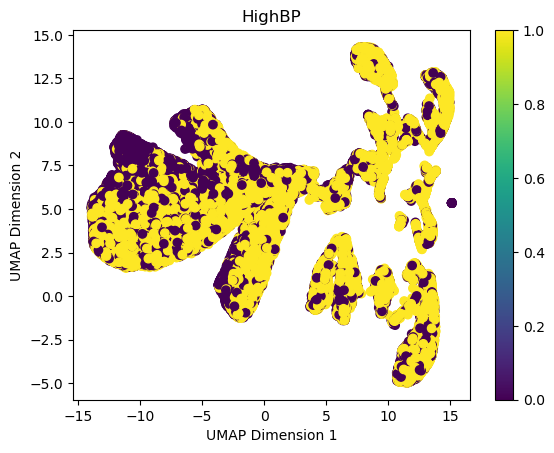

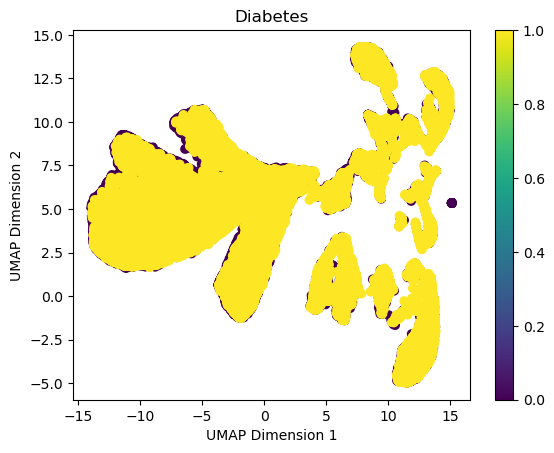

In [195]:
colnames = [i for i in diabetes.columns if 'x' not in i and 'y' not in i]

for ind,col in enumerate(colnames): 
    plt.scatter(diabetes['umap_x'], diabetes['umap_y'],c=diabetes[col])
    plt.title(f'{col}')
    plt.xlabel('UMAP Dimension 1')
    plt.ylabel('UMAP Dimension 2')
    plt.colorbar()
    plt.show()

# Unsupervised learning to find label 

In [53]:
colnames = [i for i in diabetes.columns if 'x' not in i and 'y' not in i]

In [54]:
data = diabetes[colnames]

In [55]:
data.head(2)

Age  HighChol  CholCheck  BMI  Smoker  HeartDiseaseorAttack  Fruits  \
0    4         0          1   26       0                     0       0   
1   12         1          1   26       1                     0       1   

   Veggies  GenHlth  MentHlth  DiffWalk  Stroke  HighBP  Diabetes  
0        1        3         5         0       0       1         0  
1        0        3         0         0       1       1         0

## Simple KMEANS 

In [64]:
# import libraries
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn import metrics

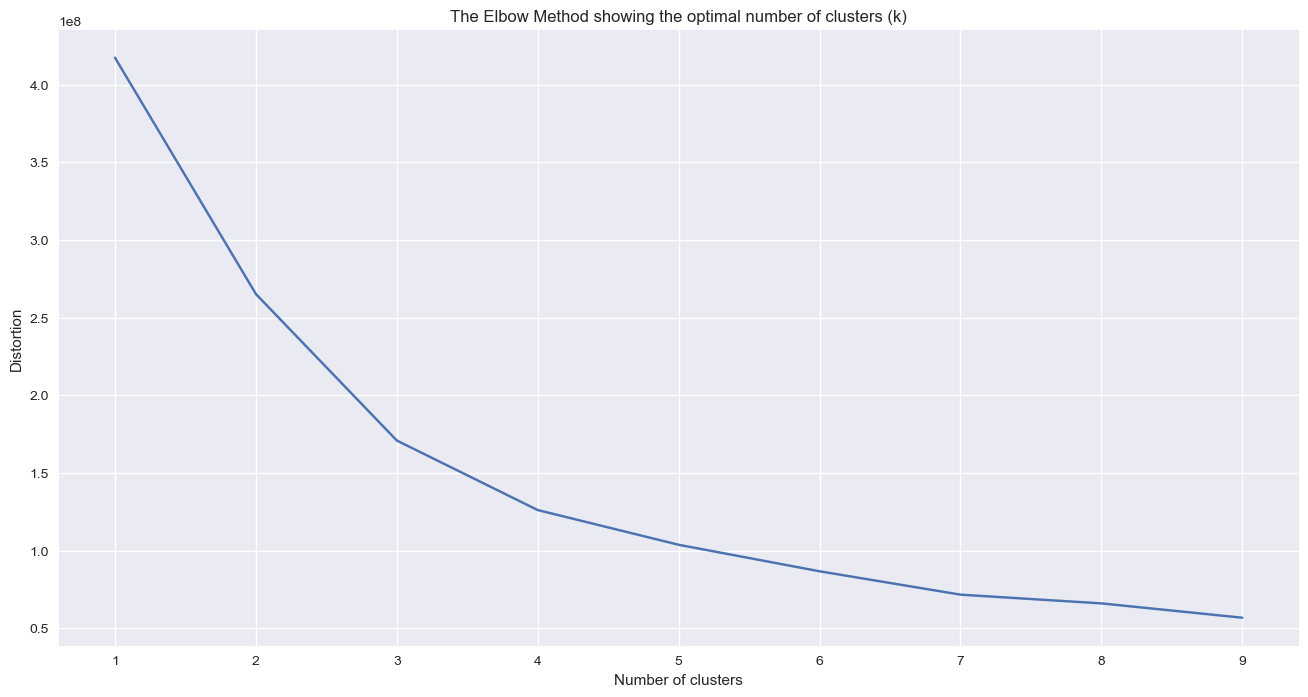

In [21]:
# Le coude pour déterminer le nombre de clusters

data = diabetes.copy()

w = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k,n_init='auto')
    kmeanModel.fit(data)
    w.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, w)
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal number of clusters (k)')

plt.show()

In [61]:
kmeans= KMeans(n_clusters=3, n_init='auto').fit(data)

#on retourne les labels 
kmeans.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int32)

In [62]:
diabetes['kmeans_labels'] = kmeans.labels_

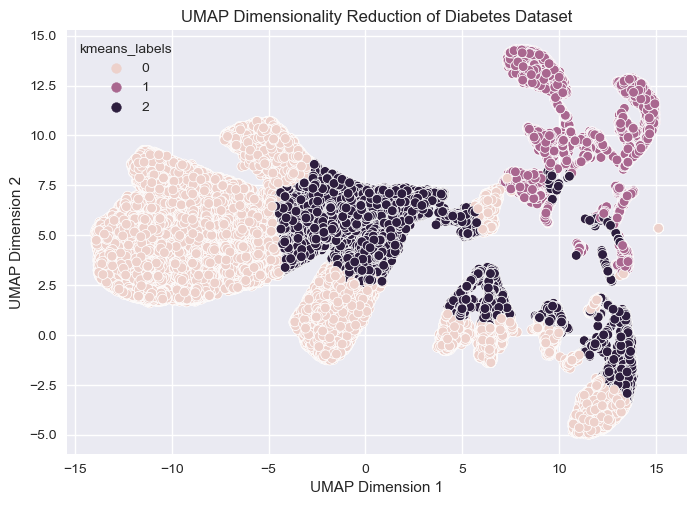

In [63]:
sns.scatterplot(data=diabetes, x="umap_x", y="umap_y", hue="kmeans_labels")

plt.title('UMAP Dimensionality Reduction of Diabetes Dataset')

plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')

plt.show()

## DBSCAN 

3

minPts is selected based on the domain knowledge. If you do not have domain understanding, a rule of thumb is to derive minPts from the number of dimensions D in the data set. minPts >= D + 1. For 2D data, take minPts = 4. For larger datasets, with much noise, it suggested to go with minPts = 2 * D.

Once you have the appropriate minPts, in order to determine the optimal eps, follow these steps -

Let's say minPts = 24

For every point in dataset, compute the distance of it's 24th nearest neighbor.(generally we use euclidean distance, but you can experiment with different distance metrics).
Sort the distances in the increasing order.
Plot the chart of distances on Y-axis v/s the index of the datapoints on X-axis.
Observe the sudden increase or what we popularly call as an 'elbow' or 'knee' in the plot. Select the distance value that corresponds to the 'elbow' as optimal eps.

In [69]:
data

Index(['Age', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'HeartDiseaseorAttack',
       'Fruits', 'Veggies', 'GenHlth', 'MentHlth', 'DiffWalk', 'Stroke',
       'HighBP', 'Diabetes'],
      dtype='object')

In [70]:
data.shape

(70692, 14)

In [88]:
from sklearn.neighbors import NearestNeighbors # importing the library

neighb = NearestNeighbors(n_neighbors=28) # creating an object of the NearestNeighbors class

nbrs=neighb.fit(data) # fitting the data to the object

distances,indices=nbrs.kneighbors(data)

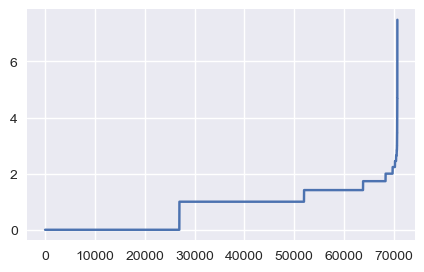

In [89]:
# Sort and plot the distances results

distances = np.sort(distances, axis = 0) # sorting the distances

distances = distances[:, 1] # taking the second column of the sorted distances

plt.rcParams['figure.figsize'] = (5,3) # setting the figure size

plt.plot(distances) # plotting the distances

plt.show() # showing the plot

In [90]:
import numpy as np

from sklearn import metrics
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=2, min_samples=10).fit(data)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 16
Estimated number of noise points: 2623


In [102]:
diabetes['dbscan_labels'] = DBSCAN(eps = 2, min_samples=28).fit_predict(diabetes[colnames]).astype(object)

In [103]:
diabetes['dbscan_labels'].value_counts().sort_index()

-1      6558
 0     57859
 1      1065
 2      3617
 3      1053
 4        26
 5       142
 6        28
 7        30
 8        73
 9       176
 10       28
 11       37
Name: dbscan_labels, dtype: int64

In [ ]:
plt.figure(figsize=(8,8))

sns.scatterplot(data=diabetes, x="umap_x", y="umap_y", hue="dbscan_labels")

plt.title(f'DBSCAN Clustering')

plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')

plt.show()

## Hierarchical clustering 

In [105]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
hierarchical_cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')

labels = hierarchical_cluster.fit_predict(data)

//anaconda3/envs/proj/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:
labels

## Gaussian mixture model

In [ ]:
from sklearn.mixture import GaussianMixture

# Supervised learning to build a production encoder model

- Build a model that has the capacity to affect new profil in a  group 

In [ ]:
# Logistic Regression 

In [ ]:
# Random Forest 